## Retrieve Frequency Counts for Users

In [1]:
import pandas as pd
import pickle
with open('fakeUsers.pickle', 'rb') as handle:
    fakeUsers = pickle.load(handle)
with open('realUsers.pickle', 'rb') as handle:
    realUsers = pickle.load(handle)
    
with open('fakeRetweets.pickle', 'rb') as handle:
    fakeRetweets = pickle.load(handle)
with open('realRetweets.pickle', 'rb') as handle:
    realRetweets = pickle.load(handle)
    
with open('fakeTweets.pickle', 'rb') as handle:
    fakeTweets = pickle.load(handle)
with open('realTweets.pickle', 'rb') as handle:
    realTweets = pickle.load(handle)
    
fakeArticlesPD = pd.read_pickle("fakePD.pkl")

with open('realArticlesDict.pickle', 'rb') as handle:
    realArticlesDict = pickle.load(handle)
realArticlesPD = pd.DataFrame(realArticlesDict)

In [2]:
fakeArticlesPD.shape

(147196, 31)

In [3]:
realArticlesPD.shape

(0, 0)

## Kernel Density Function (KDE) Histogram for Users/Tweets with Labels

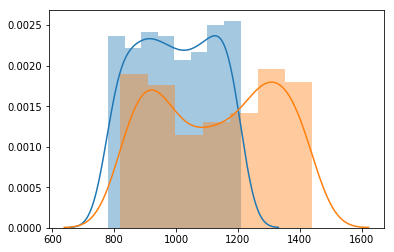

In [4]:
import seaborn as sns
import matplotlib.pylab as plt

lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

sns.distplot(y)

lists = sorted(realUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

sns.distplot(y)

## Ratio-Plot

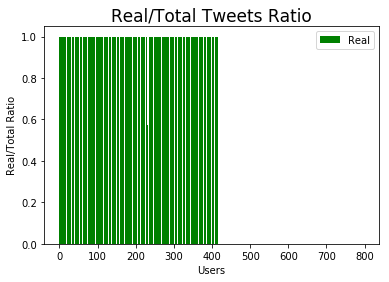

In [6]:
#Ratio-Plot
import numpy as np
import matplotlib.pylab as plt

#merge dicts
def divide(dividends, divisors):
    ret = dict()
    for key, dividend in dividends.items():
        ret[key] = dividend/(divisors.get(key, 1)+dividend)
    for key, divisor in divisors.items():
        if key not in ret.keys():
            ret[key] = dividends.get(key, 1)/(divisor+dividends.get(key,1))
    return ret# sorted by key, return a list of tuples

d3 = {}
d3 = divide(realUsers,fakeUsers)
x, y = zip(*d3.items()) # unpack a list of pairs into two tuples
ax = plt.subplot(111)
ax.bar(np.arange(len(x)), y, color='g', align='center')
ax.legend(('Real','Fake'))
ax.set_xlabel('Users')
ax.set_ylabel('Real/Total Ratio')
plt.title("Real/Total Tweets Ratio", fontsize=17)
plt.show()

## Followers Scatterplot

In [7]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_pickle("../LSTM/bigdataClean.pkl")
df.tail()

,contributors_enabled_user,created_at,created_at_user,default_profile_image_user,default_profile_user,description_user,display_url_zero_urls_entities,display_url_zero_urls_url_entities_user,expanded_url_zero_urls_entities,expanded_url_zero_urls_url_entities_user,favorite_count,favorited,favourites_count_user,follow_request_sent_user,followers_count_user,following_user,friends_count_user,geo_enabled_user,has_extended_profile_user,id,id_str,id_str_user,id_str_zero_user_mentions_entities,id_user,id_zero_user_mentions_entities,is_quote_status,is_translation_enabled_user,is_translator_user,lang,listed_count_user,location_user,name_user,name_zero_user_mentions_entities,notifications_user,possibly_sensitive,possibly_sensitive_appealable,profile_background_color_user,profile_background_image_url_https_user,profile_background_image_url_user,profile_background_tile_user,profile_banner_url_user,profile_image_url_https_user,profile_image_url_user,profile_link_color_user,profile_sidebar_border_color_user,profile_sidebar_fill_color_user,profile_text_color_user,profile_use_background_image_user,protected_user,retweet_count,retweeted,screen_name_user,screen_name_zero_user_mentions_entities,source,statuses_count_user,text,translator_type_user,truncated,url_user,url_zero_urls_entities,url_zero_urls_url_entities_user,verified_user,zero_indices_zero_urls_entities,one_indices_zero_urls_entities,zero_indices_zero_urls_url_entities_user,one_indices_zero_urls_url_entities_user,zero_indices_zero_user_mentions_entities,one_indices_zero_user_mentions_entities,followers,following,label
788,False,2017-05-20 14:11:39+00:00,Sun Oct 25 14:01:48 +0000 2009,False,True,,fb.me/1fYsjNaLC,thekind-heartedsmartaleck.blogspot.com,http://fb.me/1fYsjNaLC,http://thekind-heartedsmartaleck.blogspot.com/,0.0,False,16.0,False,47.0,False,87.0,True,True,8.659330e+17,8.659330e+17,85085807,10228272,8.508581e+07,8.529181e+16,False,False,False,en,7.0,Gassaway WV,Terry Bly,YouTube,False,False,False,C0DEED,https://abs.twimg.com/images/themes/theme1/bg.png,http://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/13552184...,https://pbs.twimg.com/profile_images/249393875...,http://pbs.twimg.com/profile_images/2493938757...,1DA1F2,C0DEED,DDEEF6,333333,True,False,0.0,False,TlbBly,YouTube,"<a href=""http://www.facebook.com/twitter"" rel=...",90486.0,WORSE THAN HITLER! Trey Gowdy’s Son Found In A...,none,False,None,https://t.co/dxpndRqHjL,http://t.co/PYrnTHpCvI,False,93.0,116.0,0.0,22.545205,49.264865,60.043243,"1093777852477116417, 936194589043683328, 10472...","1093777852477116417, 936194589043683328, 10472...",fake
789,False,2017-12-09 09:10:03+00:00,Wed Feb 24 22:58:57 +0000 2016,False,True,PROUD PATRIOT SUPPORTING TRUMP!! PRO-AMERICAN....,twitter.com/i/web/status/9…,thekind-heartedsmartaleck.blogspot.com,https://twitter.com/i/web/status/9394218766187...,http://thekind-heartedsmartaleck.blogspot.com/,0.0,False,74641.0,False,6903.0,False,4533.0,True,True,9.394219e+17,9.394219e+17,702628810483765249,10228272,7.026288e+17,8.529181e+16,False,False,False,en,86.0,"Orlando, FL",#TRUMP2020,YouTube,False,False,False,F5F8FA,None,None,False,https://pbs.twimg.com/profile_banners/70262881...,https://pbs.twimg.com/profile_images/111902430...,http://pbs.twimg.com/profile_images/1119024306...,1DA1F2,C0DEED,DDEEF6,333333,True,False,0.0,False,PolyPatriot,YouTube,"<a href=""http://twitter.com/download/iphone"" r...",155849.0,Facebook Picks Sides in Alabama Senate Race=&g...,none,True,None,https://t.co/o4Qq2UFraj,http://t.co/PYrnTHpCvI,False,120.0,143.0,0.0,22.545205,49.264865,60.043243,,,fake
790,False,2017-08-29 17:54:38+00:00,Tue Sep 15 02:55:59 +0000 2009,False,True,,houstonchronicle-tv.com/floyd-mayweath…,thekind-heartedsmartaleck.blogspot.com,http://houstonchronicle-tv.com/floyd-mayweathe...,http://thekind-heartedsmartaleck.blogspot.com/,1.0,False,11.0,False,24.0,False,42.0,True,False,9.025903e+17,9.025903e+17,74346965,10228272,7.434696e+07,8.529181e+16,False,Fa

In [8]:
print(df['followers'][7].split(', '))

['895214739025952769', '1055365096812142593', '168031218', '820078139657351168', '20352089', '1033579298446340096', '1033524908020527104', '1031902851742806016', '1033060497556422657', '1031997614399483904', '994579696980512769', '807738784649478144', '891495266494369793', '889488561183100928', '885864667859611648', '515917182', '755871070729621504', '797818619648479232', '1247820060', '1017682435', '725809776022589441', '197092714', '2848808945', '2726074611', '2486181498', '14211251', '2225985318', '780348337', '1860905490', '260493487', '1658088930', '1652338272', '260777242', '934844102', '634855241', '431316553', '243476378', '338985555', '317257842', '291123951', '247987458', '261369003', '264994815', '194492879', '138574451', '201361978', '24094463', '24345879', '29932451', '51930952', '9868472', '187528674', '117137192', '16495680', '17012119', '169622799', '134478628', '168296412', '21186125', '14902103', '112156628', '18664838', '20079353', '127562812', '71350348', '39660906'

656.6666666666666
614.6541554959786


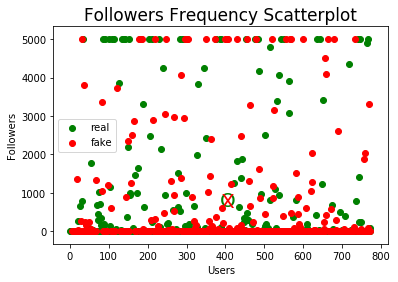

In [9]:
import matplotlib.pylab as plt
realFlw = {}
fakeFlw = {}
for i,user in enumerate(df['id_str_user']):
    if (df['label'][i]=='real'):
        temp = df['followers'][i].split(', ')
        realFlw[user] = len(temp)
        
for i,user in enumerate(df['id_str_user']):
    if (df['label'][i]=='fake'):
        temp = df['followers'][i].split(', ')
        fakeFlw[user] = len(temp)
        
for user in fakeFlw:
    if user not in realFlw.keys():
        realFlw[user] = np.nan
for user in realFlw:
    if user not in fakeFlw.keys():
        fakeFlw[user] = np.nan
        #plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
idx = []
for item in range(len(realFlw.keys())):
    idx.append(item)

items = []
fakeItems=[]
for key in realFlw.keys():
    items.append(realFlw[key])
for key in fakeFlw.keys():
    fakeItems.append(fakeFlw[key])
    
keys = sorted(set(list(realFlw.keys())+list(fakeFlw.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realFlw.keys()]
for i,key in enumerate(temp):
    realFlw[key] = realFlw.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeFlw.keys()]
for i,key in enumerate(temp):
    fakeFlw[key] = fakeFlw.pop(list(d2)[i])
print(np.array(items)[~np.isnan(items)].mean())
print(np.array(fakeItems)[~np.isnan(np.array(fakeItems))].mean())
ax1.scatter(realFlw.keys(), items, c='g', label='real')
ax1.scatter(fakeFlw.keys(), fakeItems, c='r', label='fake')
ax1.set_xlabel('Users')
ax1.set_ylabel('Followers')
x_arr = [x for x in realFlw.keys()]
y_arr = [y for y in fakeFlw.keys()]
ax1.text(np.mean(x_arr), np.array(items)[~np.isnan(np.array(items))].mean(), 'O', size=20, color='g')
ax1.text(np.mean(y_arr),np.array(fakeItems)[~np.isnan(np.array(fakeItems))].mean(), 'X', size=20, color='r')
plt.title("Followers Frequency Scatterplot", fontsize=17)
plt.legend();
plt.show()

## Followers t-SNE Plot

In [10]:
import matplotlib.pylab as plt
realUsersTotal = {}
fakeUsersTotal = {}
realUsersTotal = dict(realUsers)
fakeUsersTotal = dict(fakeUsers)
print(len(realUsersTotal.keys()))
for key in fakeUsers:
    if key not in realUsers.keys():
        realUsersTotal[key] = 0
for key in realUsers:
    if key not in fakeUsers.keys():
        fakeUsersTotal[key] = 0
print(len(realUsersTotal.keys()))

#plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

idx = []
for item in range(len(realUsersTotal.keys())):
    idx.append(item)
print(len(idx))
items = []
fakeItems=[]
for key in realUsersTotal.keys():
    items.append(realUsersTotal[key])
for key in fakeUsersTotal.keys():
    fakeItems.append(fakeUsersTotal[key])
    
keys = sorted(set(list(realUsersTotal.keys())+list(fakeUsersTotal.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realUsersTotal.keys()]
for i,key in enumerate(temp):
    realUsersTotal[key] = realUsersTotal.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeUsersTotal.keys()]
for i,key in enumerate(temp):
    fakeUsersTotal[key] = fakeUsersTotal.pop(list(d2)[i])
    
print(len(fakeUsersTotal))

combinedReal = np.vstack((list(realUsersTotal.keys()), items)).T
combinedFake = np.vstack((list(fakeUsersTotal.keys()), fakeItems)).T


RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(combinedReal[:10000])


from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points2 = tsne.fit_transform(combinedFake[:10000])

415
798
798
798


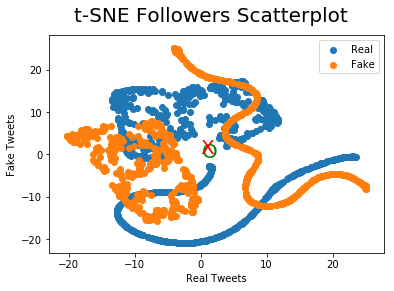

In [11]:
def plot_tsne_2d(x, y, x2, y2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    ax.text(np.mean(x),np.mean(y), 'O', size=20, color='g')
    ax.scatter(x2, y2)
    ax.text(np.mean(x2),np.mean(y2), 'X', size=20, color='r')
    ax.legend(('Real','Fake'))
    ax.set_xlabel('Real Tweets')
    ax.set_ylabel('Fake Tweets')
    fig.suptitle('t-SNE Followers Scatterplot', fontsize=20)
plot_tsne_2d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    x2 = points2[:10000, 0],
    y2 = points2[:10000, 1])

## Following Scatterplot

656.6666666666666
614.6541554959786


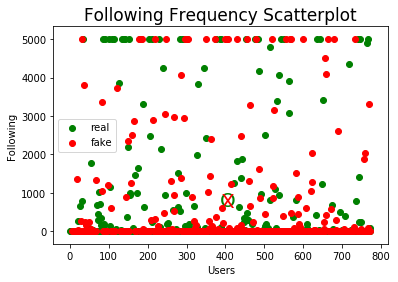

In [12]:
import matplotlib.pylab as plt
realFlw = {}
fakeFlw = {}
for i,user in enumerate(df['id_str_user']):
    if (df['label'][i]=='real'):
        temp = df['following'][i].split(', ')
        realFlw[user] = len(temp)
        
for i,user in enumerate(df['id_str_user']):
    if (df['label'][i]=='fake'):
        temp = df['following'][i].split(', ')
        fakeFlw[user] = len(temp)
        
for user in fakeFlw:
    if user not in realFlw.keys():
        realFlw[user] = np.nan
for user in realFlw:
    if user not in fakeFlw.keys():
        fakeFlw[user] = np.nan
        #plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
idx = []
for item in range(len(realFlw.keys())):
    idx.append(item)

items = []
fakeItems=[]
for key in realFlw.keys():
    items.append(realFlw[key])
for key in fakeFlw.keys():
    fakeItems.append(fakeFlw[key])
    
keys = sorted(set(list(realFlw.keys())+list(fakeFlw.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realFlw.keys()]
for i,key in enumerate(temp):
    realFlw[key] = realFlw.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeFlw.keys()]
for i,key in enumerate(temp):
    fakeFlw[key] = fakeFlw.pop(list(d2)[i])
print(np.array(items)[~np.isnan(items)].mean())
print(np.array(fakeItems)[~np.isnan(np.array(fakeItems))].mean())
ax1.scatter(realFlw.keys(), items, c='g', label='real')
ax1.scatter(fakeFlw.keys(), fakeItems, c='r', label='fake')
ax1.set_xlabel('Users')
ax1.set_ylabel('Following')
x_arr = [x for x in realFlw.keys()]
y_arr = [y for y in fakeFlw.keys()]
ax1.text(np.mean(x_arr), np.array(items)[~np.isnan(np.array(items))].mean(), 'O', size=20, color='g')
ax1.text(np.mean(y_arr),np.array(fakeItems)[~np.isnan(np.array(fakeItems))].mean(), 'X', size=20, color='r')
plt.title("Following Frequency Scatterplot", fontsize=17)
plt.legend();
plt.show()

## Following t-SNE Plot

In [13]:
import matplotlib.pylab as plt
realUsersTotal = {}
fakeUsersTotal = {}
realUsersTotal = dict(realUsers)
fakeUsersTotal = dict(fakeUsers)
print(len(realUsersTotal.keys()))
for key in fakeUsers:
    if key not in realUsers.keys():
        realUsersTotal[key] = 0
for key in realUsers:
    if key not in fakeUsers.keys():
        fakeUsersTotal[key] = 0
print(len(realUsersTotal.keys()))

#plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

idx = []
for item in range(len(realUsersTotal.keys())):
    idx.append(item)
print(len(idx))
items = []
fakeItems=[]
for key in realUsersTotal.keys():
    items.append(realUsersTotal[key])
for key in fakeUsersTotal.keys():
    fakeItems.append(fakeUsersTotal[key])
    
keys = sorted(set(list(realUsersTotal.keys())+list(fakeUsersTotal.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realUsersTotal.keys()]
for i,key in enumerate(temp):
    realUsersTotal[key] = realUsersTotal.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeUsersTotal.keys()]
for i,key in enumerate(temp):
    fakeUsersTotal[key] = fakeUsersTotal.pop(list(d2)[i])
    
print(len(fakeUsersTotal))

combinedReal = np.vstack((list(realUsersTotal.keys()), items)).T
combinedFake = np.vstack((list(fakeUsersTotal.keys()), fakeItems)).T


RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(combinedReal[:10000])


from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points2 = tsne.fit_transform(combinedFake[:10000])

415
798
798
798


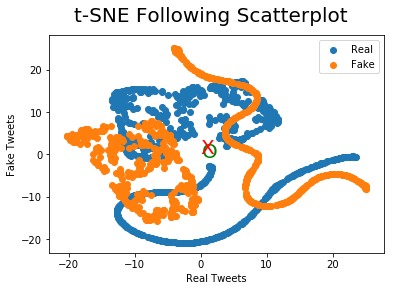

In [14]:
def plot_tsne_2d(x, y, x2, y2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    ax.text(np.mean(x),np.mean(y), 'O', size=20, color='g')
    ax.scatter(x2, y2)
    ax.text(np.mean(x2),np.mean(y2), 'X', size=20, color='r')
    ax.legend(('Real','Fake'))
    ax.set_xlabel('Real Tweets')
    ax.set_ylabel('Fake Tweets')
    fig.suptitle('t-SNE Following Scatterplot', fontsize=20)
plot_tsne_2d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    x2 = points2[:10000, 0],
    y2 = points2[:10000, 1])

## Tweet/Retweet Frequency Scatterplot

1131.8409638554217
996.795865633075
798
798


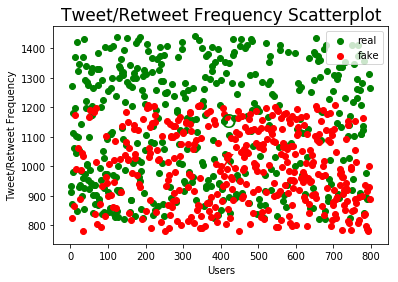

In [15]:
#Ratio-Plot
import matplotlib.pylab as plt
realUsersTotal = {}
fakeUsersTotal = {}
realUsersTotal = dict(realUsers)
fakeUsersTotal = dict(fakeUsers)

for key in fakeUsers:
    if key not in realUsers.keys():
        realUsersTotal[key] = np.nan
for key in realUsers:
    if key not in fakeUsers.keys():
        fakeUsersTotal[key] = np.nan

#plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
idx = []
for item in range(len(realUsersTotal.keys())):
    idx.append(item)
items = []
fakeItems=[]
for key in realUsersTotal.keys():
    items.append(realUsersTotal[key])
for key in fakeUsersTotal.keys():
    fakeItems.append(fakeUsersTotal[key])
    
keys = sorted(set(list(realUsersTotal.keys())+list(fakeUsersTotal.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realUsersTotal.keys()]
for i,key in enumerate(temp):
    realUsersTotal[key] = realUsersTotal.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeUsersTotal.keys()]
for i,key in enumerate(temp):
    fakeUsersTotal[key] = fakeUsersTotal.pop(list(d2)[i])

ax1.scatter(realUsersTotal.keys(), items, c='g', label='real')
ax1.scatter(fakeUsersTotal.keys(), fakeItems, c='r', label='fake')
ax1.set_xlabel('Users')
ax1.set_ylabel('Tweet/Retweet Frequency')
x_arr = [x for x in realUsersTotal.keys()]
y_arr = [y for y in fakeUsersTotal.keys()]
print(np.array(items)[~np.isnan(items)].mean())
print(np.array(fakeItems)[~np.isnan(fakeItems)].mean())
print(len(items))
print(len(fakeItems))
ax1.text(np.mean(x_arr), np.array(items)[~np.isnan(items)].mean(), 'O', size=20, color='g')
ax1.text(np.mean(y_arr),np.array(fakeItems)[~np.isnan(fakeItems)].mean(), 'X', size=20, color='r')
plt.title("Tweet/Retweet Frequency Scatterplot", fontsize=17)
plt.legend();
plt.show()

In [16]:
for key in realUsers.keys():
    if key in fakeUsers.keys():
        print(key)

14345062
225265639
491773328
959856286061006848


## Tweet/Retweet Frequency t-SNE Plot

In [17]:
import matplotlib.pylab as plt
realUsersTotal = {}
fakeUsersTotal = {}
realUsersTotal = dict(realUsers)
fakeUsersTotal = dict(fakeUsers)
print(len(realUsersTotal.keys()))
for key in fakeUsers:
    if key not in realUsers.keys():
        realUsersTotal[key] = 0
for key in realUsers:
    if key not in fakeUsers.keys():
        fakeUsersTotal[key] = 0
print(len(realUsersTotal.keys()))

#plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

idx = []
for item in range(len(realUsersTotal.keys())):
    idx.append(item)
print(len(idx))
items = []
fakeItems=[]
for key in realUsersTotal.keys():
    items.append(realUsersTotal[key])
for key in fakeUsersTotal.keys():
    fakeItems.append(fakeUsersTotal[key])
    
keys = sorted(set(list(realUsersTotal.keys())+list(fakeUsersTotal.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realUsersTotal.keys()]
for i,key in enumerate(temp):
    realUsersTotal[key] = realUsersTotal.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeUsersTotal.keys()]
for i,key in enumerate(temp):
    fakeUsersTotal[key] = fakeUsersTotal.pop(list(d2)[i])
    
print(len(fakeUsersTotal))

combinedReal = np.vstack((list(realUsersTotal.keys()), items)).T
combinedFake = np.vstack((list(fakeUsersTotal.keys()), fakeItems)).T


RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(combinedReal[:10000])


from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points2 = tsne.fit_transform(combinedFake[:10000])

415
798
798
798


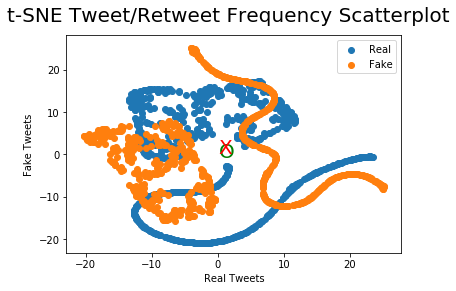

In [18]:
def plot_tsne_2d(x, y, x2, y2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    ax.text(np.mean(x),np.mean(y), 'O', size=20, color='g')
    ax.scatter(x2, y2)
    ax.text(np.mean(x2),np.mean(y2), 'X', size=20, color='r')
    ax.legend(('Real','Fake'))
    ax.set_xlabel('Real Tweets')
    ax.set_ylabel('Fake Tweets')
    fig.suptitle('t-SNE Tweet/Retweet Frequency Scatterplot', fontsize=20)
plot_tsne_2d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    x2 = points2[:10000, 0],
    y2 = points2[:10000, 1])

## Tweet Frequency Scatterplot

1129.4987212276214
1001.536312849162
745
745


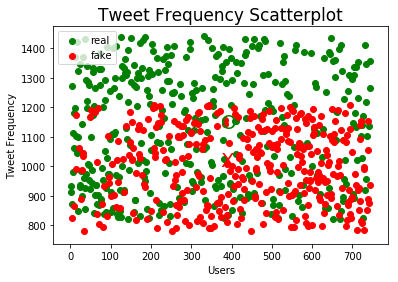

In [19]:
#Ratio-Plot
import matplotlib.pylab as plt
realUsersTotal = {}
fakeUsersTotal = {}
realUsersTotal = dict(realTweets)
fakeUsersTotal = dict(fakeTweets)
for key in fakeTweets:
    if key not in realTweets.keys():
        realUsersTotal[key] = np.nan
for key in realTweets:
    if key not in fakeTweets.keys():
        fakeUsersTotal[key] = np.nan

#plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
idx = []
for item in range(len(realUsersTotal.keys())):
    idx.append(item)
items = []
fakeItems=[]
for key in realUsersTotal.keys():
    items.append(realUsersTotal[key])
for key in fakeUsersTotal.keys():
    fakeItems.append(fakeUsersTotal[key])
    
keys = sorted(set(list(realUsersTotal.keys())+list(fakeUsersTotal.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realUsersTotal.keys()]
for i,key in enumerate(temp):
    realUsersTotal[key] = realUsersTotal.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeUsersTotal.keys()]
for i,key in enumerate(temp):
    fakeUsersTotal[key] = fakeUsersTotal.pop(list(d2)[i])
    
ax1.scatter(realUsersTotal.keys(), items, c='g', label='real')
ax1.scatter(fakeUsersTotal.keys(), fakeItems, c='r', label='fake')
x_arr = [x for x in realUsersTotal.keys()]
y_arr = [y for y in fakeUsersTotal.keys()]
print(np.array(items)[~np.isnan(items)].mean())
print(np.array(fakeItems)[~np.isnan(fakeItems)].mean())
print(len(items))
print(len(fakeItems))
ax1.text(np.mean(x_arr), np.array(items)[~np.isnan(items)].mean(), 'O', size=20, color='g')
ax1.text(np.mean(y_arr),np.array(fakeItems)[~np.isnan(fakeItems)].mean(), 'X', size=20, color='r')
ax1.set_xlabel('Users')
ax1.set_ylabel('Tweet Frequency')
plt.title("Tweet Frequency Scatterplot", fontsize=17)
plt.legend();
plt.show()

## Tweet t-SNE Plot

In [20]:
import matplotlib.pylab as plt
realUsersTotal = {}
fakeUsersTotal = {}
realUsersTotal = dict(realUsers)
fakeUsersTotal = dict(fakeUsers)
print(len(realUsersTotal.keys()))
for key in fakeUsers:
    if key not in realUsers.keys():
        realUsersTotal[key] = 0
for key in realUsers:
    if key not in fakeUsers.keys():
        fakeUsersTotal[key] = 0
print(len(realUsersTotal.keys()))

#plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

idx = []
for item in range(len(realUsersTotal.keys())):
    idx.append(item)
print(len(idx))
items = []
fakeItems=[]
for key in realUsersTotal.keys():
    items.append(realUsersTotal[key])
for key in fakeUsersTotal.keys():
    fakeItems.append(fakeUsersTotal[key])
    
keys = sorted(set(list(realUsersTotal.keys())+list(fakeUsersTotal.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realUsersTotal.keys()]
for i,key in enumerate(temp):
    realUsersTotal[key] = realUsersTotal.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeUsersTotal.keys()]
for i,key in enumerate(temp):
    fakeUsersTotal[key] = fakeUsersTotal.pop(list(d2)[i])
    
print(len(fakeUsersTotal))

combinedReal = np.vstack((list(realUsersTotal.keys()), items)).T
combinedFake = np.vstack((list(fakeUsersTotal.keys()), fakeItems)).T


RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(combinedReal[:10000])


from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points2 = tsne.fit_transform(combinedFake[:10000])

415
798
798
798


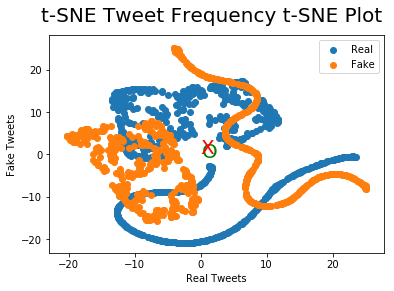

In [21]:
def plot_tsne_2d(x, y, x2, y2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    ax.text(np.mean(x),np.mean(y), 'O', size=20, color='g')
    ax.scatter(x2, y2)
    ax.text(np.mean(x2),np.mean(y2), 'X', size=20, color='r')
    ax.legend(('Real','Fake'))
    ax.set_xlabel('Real Tweets')
    ax.set_ylabel('Fake Tweets')
    fig.suptitle('t-SNE Tweet Frequency t-SNE Plot', fontsize=20)
plot_tsne_2d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    x2 = points2[:10000, 0],
    y2 = points2[:10000, 1])

## Retweet Frequency Scatterplot

24
53
53
53
1170.0
938.2758620689655


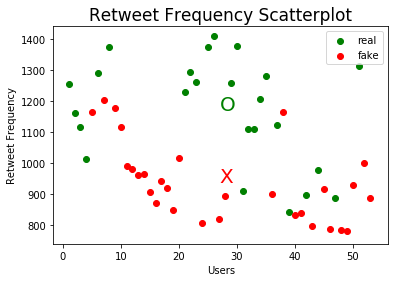

In [22]:
#Ratio-Plot
import matplotlib.pylab as plt
realUsersTotal = {}
fakeUsersTotal = {}
realUsersTotal = dict(realRetweets)
fakeUsersTotal = dict(fakeRetweets)
print(len(realUsersTotal.keys()))
for key in fakeRetweets:
    if key not in realRetweets.keys():
        realUsersTotal[key] = np.nan
for key in realRetweets:
    if key not in fakeRetweets.keys():
        fakeUsersTotal[key] = np.nan
print(len(realUsersTotal.keys()))

#plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
idx = []
for item in range(len(realUsersTotal.keys())):
    idx.append(item)
print(len(idx))
items = []
fakeItems=[]
for key in realUsersTotal.keys():
    items.append(realUsersTotal[key])
for key in fakeUsersTotal.keys():
    fakeItems.append(fakeUsersTotal[key])
    
keys = sorted(set(list(realUsersTotal.keys())+list(fakeUsersTotal.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realUsersTotal.keys()]
for i,key in enumerate(temp):
    realUsersTotal[key] = realUsersTotal.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeUsersTotal.keys()]
for i,key in enumerate(temp):
    fakeUsersTotal[key] = fakeUsersTotal.pop(list(d2)[i])
    
print(len(fakeUsersTotal))
ax1.scatter(realUsersTotal.keys(), items, c='g', label='real')
ax1.scatter(fakeUsersTotal.keys(), fakeItems, c='r', label='fake')
x_arr = [x for x in realUsersTotal.keys()]
y_arr = [y for y in fakeUsersTotal.keys()]
print(np.array(items)[~np.isnan(items)].mean())
print(np.array(fakeItems)[~np.isnan(fakeItems)].mean())
ax1.text(np.mean(x_arr), np.array(items)[~np.isnan(items)].mean(), 'O', size=20, color='g')
ax1.text(np.mean(y_arr),np.array(fakeItems)[~np.isnan(fakeItems)].mean(), 'X', size=20, color='r')
ax1.set_xlabel('Users')
ax1.set_ylabel('Retweet Frequency')
plt.title("Retweet Frequency Scatterplot", fontsize=17)
plt.legend();
plt.show()

## Retweet t-SNE Plot

In [23]:
import matplotlib.pylab as plt
realUsersTotal = {}
fakeUsersTotal = {}
realUsersTotal = dict(realUsers)
fakeUsersTotal = dict(fakeUsers)
print(len(realUsersTotal.keys()))
for key in fakeUsers:
    if key not in realUsers.keys():
        realUsersTotal[key] = 0
for key in realUsers:
    if key not in fakeUsers.keys():
        fakeUsersTotal[key] = 0
print(len(realUsersTotal.keys()))

#plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

idx = []
for item in range(len(realUsersTotal.keys())):
    idx.append(item)
print(len(idx))
items = []
fakeItems=[]
for key in realUsersTotal.keys():
    items.append(realUsersTotal[key])
for key in fakeUsersTotal.keys():
    fakeItems.append(fakeUsersTotal[key])
    
keys = sorted(set(list(realUsersTotal.keys())+list(fakeUsersTotal.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realUsersTotal.keys()]
for i,key in enumerate(temp):
    realUsersTotal[key] = realUsersTotal.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeUsersTotal.keys()]
for i,key in enumerate(temp):
    fakeUsersTotal[key] = fakeUsersTotal.pop(list(d2)[i])
    
print(len(fakeUsersTotal))

combinedReal = np.vstack((list(realUsersTotal.keys()), items)).T
combinedFake = np.vstack((list(fakeUsersTotal.keys()), fakeItems)).T


RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(combinedReal[:10000])


from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points2 = tsne.fit_transform(combinedFake[:10000])

415
798
798
798


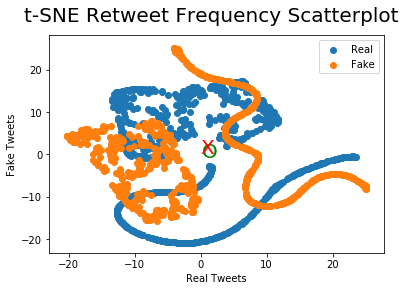

In [24]:
def plot_tsne_2d(x, y, x2, y2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    ax.text(np.mean(x),np.mean(y), 'O', size=20, color='g')
    ax.scatter(x2, y2)
    ax.text(np.mean(x2),np.mean(y2), 'X', size=20, color='r')
    ax.legend(('Real','Fake'))
    ax.set_xlabel('Real Tweets')
    ax.set_ylabel('Fake Tweets')
    fig.suptitle('t-SNE Retweet Frequency Scatterplot', fontsize=20)
plot_tsne_2d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    x2 = points2[:10000, 0],
    y2 = points2[:10000, 1])

## CDF Plot

Text(0, 0.5, 'Probability')

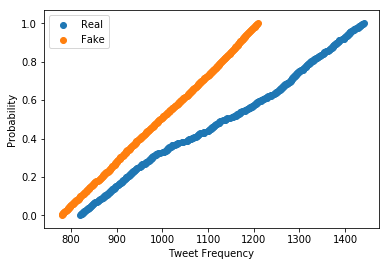

In [25]:
#CDF
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

realTemp=list(realUsers.values())
ax = plt.subplot(111)
x = np.sort(realTemp)
n = x.size
y = np.arange(1, n+1) / n

ax.scatter(x=x, y=y);

fakeTemp=list(fakeUsers.values())
x = np.sort(fakeTemp)
n = x.size
y = np.arange(1, n+1) / n

ax.scatter(x=x, y=y);

ax.legend(('Real','Fake'))
ax.set_xlabel('Tweet Frequency')
ax.set_ylabel('Probability')

## Cascade Scatterplot

In [26]:
numRetweeted = 0
numRetweetedFalse = 0
for i, row in enumerate(fakeArticlesPD['retweets']):
    try:
        if (fakeArticlesPD['retweets'][i][0]['retweeted']):
            numRetweeted += 1
        elif (fakeArticlesPD['retweets'][i][0]['retweeted'] is False):
            numRetweetedFalse += 1
    except TypeError:
        pass
    except IndexError:
        pass
print(numRetweeted)
print(numRetweetedFalse)

numRetweeted = 0
numRetweetedFalse = 0
for i, row in enumerate(fakeArticlesPD['retweets']):
    try:
        if (realArticlesPD['retweets'][i][0]['retweeted']):
            numRetweeted += 1
        elif (realArticlesPD['retweets'][i][0]['retweeted'] is False):
            numRetweetedFalse += 1
    except TypeError:
        pass
    except IndexError:
        pass
print(numRetweeted)
print(numRetweetedFalse)

#No retweets are retweeted! -> only 2 hops
#CANT DO CASCADE PLOT, BECAUSE THERE IS ONLY TWO HOPS FOR EACH TWEET!

0
29
0
23


## Followers Reached Scatterplot

In [27]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_pickle("../LSTM/bigdataClean.pkl")
df.tail()

,contributors_enabled_user,created_at,created_at_user,default_profile_image_user,default_profile_user,description_user,display_url_zero_urls_entities,display_url_zero_urls_url_entities_user,expanded_url_zero_urls_entities,expanded_url_zero_urls_url_entities_user,favorite_count,favorited,favourites_count_user,follow_request_sent_user,followers_count_user,following_user,friends_count_user,geo_enabled_user,has_extended_profile_user,id,id_str,id_str_user,id_str_zero_user_mentions_entities,id_user,id_zero_user_mentions_entities,is_quote_status,is_translation_enabled_user,is_translator_user,lang,listed_count_user,location_user,name_user,name_zero_user_mentions_entities,notifications_user,possibly_sensitive,possibly_sensitive_appealable,profile_background_color_user,profile_background_image_url_https_user,profile_background_image_url_user,profile_background_tile_user,profile_banner_url_user,profile_image_url_https_user,profile_image_url_user,profile_link_color_user,profile_sidebar_border_color_user,profile_sidebar_fill_color_user,profile_text_color_user,profile_use_background_image_user,protected_user,retweet_count,retweeted,screen_name_user,screen_name_zero_user_mentions_entities,source,statuses_count_user,text,translator_type_user,truncated,url_user,url_zero_urls_entities,url_zero_urls_url_entities_user,verified_user,zero_indices_zero_urls_entities,one_indices_zero_urls_entities,zero_indices_zero_urls_url_entities_user,one_indices_zero_urls_url_entities_user,zero_indices_zero_user_mentions_entities,one_indices_zero_user_mentions_entities,followers,following,label
788,False,2017-05-20 14:11:39+00:00,Sun Oct 25 14:01:48 +0000 2009,False,True,,fb.me/1fYsjNaLC,thekind-heartedsmartaleck.blogspot.com,http://fb.me/1fYsjNaLC,http://thekind-heartedsmartaleck.blogspot.com/,0.0,False,16.0,False,47.0,False,87.0,True,True,8.659330e+17,8.659330e+17,85085807,10228272,8.508581e+07,8.529181e+16,False,False,False,en,7.0,Gassaway WV,Terry Bly,YouTube,False,False,False,C0DEED,https://abs.twimg.com/images/themes/theme1/bg.png,http://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/13552184...,https://pbs.twimg.com/profile_images/249393875...,http://pbs.twimg.com/profile_images/2493938757...,1DA1F2,C0DEED,DDEEF6,333333,True,False,0.0,False,TlbBly,YouTube,"<a href=""http://www.facebook.com/twitter"" rel=...",90486.0,WORSE THAN HITLER! Trey Gowdy’s Son Found In A...,none,False,None,https://t.co/dxpndRqHjL,http://t.co/PYrnTHpCvI,False,93.0,116.0,0.0,22.545205,49.264865,60.043243,"1093777852477116417, 936194589043683328, 10472...","1093777852477116417, 936194589043683328, 10472...",fake
789,False,2017-12-09 09:10:03+00:00,Wed Feb 24 22:58:57 +0000 2016,False,True,PROUD PATRIOT SUPPORTING TRUMP!! PRO-AMERICAN....,twitter.com/i/web/status/9…,thekind-heartedsmartaleck.blogspot.com,https://twitter.com/i/web/status/9394218766187...,http://thekind-heartedsmartaleck.blogspot.com/,0.0,False,74641.0,False,6903.0,False,4533.0,True,True,9.394219e+17,9.394219e+17,702628810483765249,10228272,7.026288e+17,8.529181e+16,False,False,False,en,86.0,"Orlando, FL",#TRUMP2020,YouTube,False,False,False,F5F8FA,None,None,False,https://pbs.twimg.com/profile_banners/70262881...,https://pbs.twimg.com/profile_images/111902430...,http://pbs.twimg.com/profile_images/1119024306...,1DA1F2,C0DEED,DDEEF6,333333,True,False,0.0,False,PolyPatriot,YouTube,"<a href=""http://twitter.com/download/iphone"" r...",155849.0,Facebook Picks Sides in Alabama Senate Race=&g...,none,True,None,https://t.co/o4Qq2UFraj,http://t.co/PYrnTHpCvI,False,120.0,143.0,0.0,22.545205,49.264865,60.043243,,,fake
790,False,2017-08-29 17:54:38+00:00,Tue Sep 15 02:55:59 +0000 2009,False,True,,houstonchronicle-tv.com/floyd-mayweath…,thekind-heartedsmartaleck.blogspot.com,http://houstonchronicle-tv.com/floyd-mayweathe...,http://thekind-heartedsmartaleck.blogspot.com/,1.0,False,11.0,False,24.0,False,42.0,True,False,9.025903e+17,9.025903e+17,74346965,10228272,7.434696e+07,8.529181e+16,False,Fa

Int64Index([113, 181, 410, 411, 412, 413, 414, 415, 416, 417,
            ...
            783, 784, 785, 786, 787, 788, 789, 790, 791, 792], dtype='int64', length=385)
RangeIndex(start=0, stop=385, step=1)
<class 'datetime.datetime'>
<class 'datetime.datetime'>
385
385


C:\Users\henri\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\henri\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'datetime.datetime'>
<class 'datetime.datetime'>
408
408


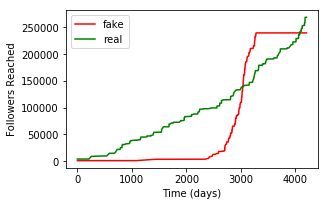

In [28]:
#X-TIME, Y-NUMBER OF RETWEETS
#les bigDataClean.pkl for followers
#MAKE DICT OF TIME:NUM_FOLLOWERS
#NUM_FOLLOWERS IS CUMULATIVE SUM OF FOLLOWERS WITH RESPECT TO TIME
#use 1975 to compute times in seconds
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dtime
import matplotlib.pylab as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_pickle("../LSTM/bigdataClean.pkl")

#split dataset on class label:
datasets = {}
by_class = df.groupby('label')
        
for groups, data in by_class:
    datasets[groups] = data

fakeDF = pd.DataFrame()
realDF = pd.DataFrame()
for i, dataset in enumerate(datasets):
    if i == 0:
        fakeDF = datasets[dataset]
    else:
        realDF = datasets[dataset]
print(fakeDF['created_at'].keys())
fakeDF = fakeDF.reset_index(drop=True)
print(fakeDF['created_at'].keys())
realDF = realDF.reset_index(drop=True)

uniqueFollowers = {}
Followers_time = {}
for i,temp in enumerate(fakeDF['created_at']):
    l = str(fakeDF['created_at'][i]).split(' ') #split on space, + and -
    l = ' '.join(l)
    l = l.split('+')
    #print(l)
    
    del l[1]
    l = ' '.join(l)
    l = l.split('-')
    l[1] = dtime.date(1900, int(l[1]), 1).strftime('%B')
    temp = l[1]
    l[1] = temp[0:3]
    l = ' '.join(l)
        #print(l)
    date = datetime.strptime(l,'%Y %b %d %H:%M:%S')
    fakeDF['created_at'][i] = date
fakeDF=fakeDF.sort_values('created_at')
    
minKey = fakeDF['created_at'].keys()[0]
print(type(fakeDF['created_at'][minKey]))
print(type(fakeDF['created_at'][83]))
created_seconds = {}
for key in fakeDF['created_at'].keys():
    time = fakeDF['created_at'][key]-fakeDF['created_at'][minKey]
    created_seconds[key] = time.total_seconds()

#add unique followers to dict for each article:
for i, art in enumerate(fakeDF['followers']):
    uniqueFollowers[i] = fakeDF['followers'][i].split(', ')
    uniqueFollowers[i] = list(set(uniqueFollowers[i]))
    
x=[] #Days
for seconds in created_seconds:
    x.append(created_seconds[seconds]/(60*60*24))
print(len(x))
y=[] #Followers
for key in created_seconds.keys():
    if fakeDF['followers'][key]=='':
        y.append(0)
    else:
        y.append(len(uniqueFollowers[key]))
    
#compute cumsum for y:
y=np.cumsum(y)

print(len(y))

uniqueFollowers = {}
Followers_time = {}
for i,temp in enumerate(realDF['created_at']):
    l = str(realDF['created_at'][i]).split(' ') #split on space, + and -
    l = ' '.join(l)
    l = l.split('+')
    #print(l)
    
    del l[1]
    l = ' '.join(l)
    l = l.split('-')
    l[1] = dtime.date(1900, int(l[1]), 1).strftime('%B')
    temp = l[1]
    l[1] = temp[0:3]
    l = ' '.join(l)
        #print(l)
    date = datetime.strptime(l,'%Y %b %d %H:%M:%S')
    realDF['created_at'][i] = date
realDF=realDF.sort_values('created_at')
    
minKey = realDF['created_at'].keys()[0]
print(type(realDF['created_at'][minKey]))
print(type(realDF['created_at'][83]))
created_seconds = {}
for key in realDF['created_at'].keys():
    time = realDF['created_at'][key]-realDF['created_at'][minKey]
    created_seconds[key] = time.total_seconds()

#add unique followers to dict for each article:
for i, art in enumerate(realDF['followers']):
    uniqueFollowers[i] = realDF['followers'][i].split(', ')
    uniqueFollowers[i] = list(set(uniqueFollowers[i]))
    
x2=[] #Days
for seconds in created_seconds:
    x2.append(created_seconds[seconds]/(60*60*24))
print(len(x2))
y2=[] #Followers
for key in created_seconds.keys():
    if realDF['followers'][key]=='':
        y2.append(0)
    else:
        y2.append(len(uniqueFollowers[key]))
    
#compute cumsum for y:
y2=np.cumsum(y2)

print(len(y2))

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)

x=np.append(x,x2[len(x2)-1])
y=np.append(y,y[len(y)-1])

ax.plot(x, y, 'r', label='fake')

ax.plot(x2, y2, 'g', label='real')
    
ax.set_xlabel('Time (days)')
ax.set_ylabel('Followers Reached')
ax.legend()
    
plt.show()
#SPLIT DF IN FAKE AND REAL
#PLOT

## Read News Articles

In [32]:
import pickle
import pandas as pd

fakeArticles = pd.read_pickle("fakeArticlesPD.pkl")
realArticles = pd.read_pickle("realArticlesPD.pkl")

In [33]:
fakeArticles.head()

,url,text,images,top_img,keywords,authors,canonical_link,title,meta_data,movies,publish_date,source,summary
0,http://www.occupydemocrats.com/virginia-republ...,335 SHARES SHARE THIS STORY\n\nRepublican atta...,[http://occupydemocrats.com/wp-content/uploads...,http://occupydemocrats.com/wp-content/uploads/...,[],"[Download Our New App Free, Colin Taylor]",http://occupydemocrats.com/2016/01/12/virginia...,Virginia Republican Wants Schools To Check Chi...,"{'viewport': 'width=device-width, initial-scal...",[],1.452629e+09,http://www.occupydemocrats.com,
1,https://www.facebook.com/OccupyDemocrats/photo...,Vi bruker informasjonskapsler for å gjøre innh...,[https://scontent-arn2-1.xx.fbcdn.net/v/t1.0-1...,https://scontent-arn2-1.xx.fbcdn.net/v/t1.0-9/...,[],[],https://www.facebook.com/OccupyDemocrats/photo...,The numbers don't lie... - Occupy Democrats,"{'referrer': 'default', 'description': 'The nu...",[],NaN,https://www.facebook.com,
2,http://www.alison-jackson.co.uk/mental-images/...,Mental Images\n\n“My pictures ask where does t...,[https://static1.squarespace.com/static/544d37...,https://static1.squarespace.com/static/544d37f...,[],[],http://www.alison-jackson.co.uk/mental-images,Mental Images — Alison Jackson,"{'viewport': 'width=device-width,initial-scale...",[],NaN,http://www.alison-jackson.co.uk,
3,http://www.bbc.com/news/election-us-2016-37987...,A fabricated news story claiming Hollywood act...,[https://ichef.bbci.co.uk/news/320/cpsprodpb/F...,https://ichef.bbci.co.uk/news/1024/branded_new...,[],[],https://www.bbc.com/news/election-us-2016-3798...,Denzel Washington hit by Facebook fake news st...,"{'viewport': 'width=device-width, initial-scal...",[],NaN,http://www.bbc.com,
4,genius.com/discussions/219349-Donald-trump-pro...,Fake story here…\n\nhttp://abcnews.com.co/dona...,[https://images.genius.com/avatars/small/61f70...,http://assets.genius.com/images/sharing_fallba...,[],[],https://genius.com/discussions/219349-Donald-t...,Donald Trump Protester Speaks Out: “I Was Paid...,"{'apple-itunes-app': 'app-id=709482991', 'og':...",[],NaN,http://genius.com,


In [34]:
realArticles.head()

,url,text,images,top_img,keywords,authors,canonical_link,title,meta_data,movies,publish_date,source,summary
0,http://thomas.loc.gov/cgi-bin/bdquery/z?d103:H...,There are 2 summaries for H.R.1025. Conference...,[https://www.congress.gov/img/svg/copyright-lo...,https://www.congress.gov/img/FB_opengraph1200b...,[],"[Schumer, Charles E.]",https://www.congress.gov/bill/103rd-congress/h...,H.R.1025 - 103rd Congress (1993-1994): Brady H...,{'canonical': 'https://www.congress.gov/bill/1...,[],NaN,http://thomas.loc.gov,
1,http://www.senate.gov/legislative/LIS/roll_cal...,Roll Call Vote 111th Congress - 1st Session\n\...,[http://www.senate.gov/resources/graphic/horiz...,http://www.senate.gov/resources/images/us_sen.ico,[],[],,U.S. Senate: U.S. Senate Roll Call Votes 111th...,"{'viewport': 'width=device-width, initial-scal...",[],NaN,http://www.senate.gov,
2,http://www.politico.com/news/stories/0509/2241...,Barack Obama ended up in the middle of an unli...,[https://static.politico.com/dims4/default/116...,http://s3-origin-images.politico.com/news/0905...,[],[Alexander Burns],https://www.politico.com/story/2009/05/trump-o...,Trump on Prejean: Same as Obama,{'og': {'title': 'Trump on Prejean: Same as Ob...,[],1.242120e+09,http://www.politico.com,
3,http://www.politico.com/magazine/story/2014/10...,Kyle Kondik is managing editor of Sabato’s Cry...,[http://s3-origin-images.politico.com/2014/10/...,http://s3-origin-images.politico.com/2014/10/2...,[],"[Jack Shafer, Kyle Kondik]",https://www.politico.com/magazine/story/2014/1...,"If Democrats Lose, Blame These Guys","{'og': {'title': 'If Democrats Lose, Blame The...",[],1.413984e+09,http://www.politico.com,
4,http://pollingreport.com/CongJob.htm,Tweet CONGRESS – Job Rating See also: Detailed...,[http://pollingreport.com/images/logo3.gif],,[],[],,Congress: Job Ratings,"{'GENERATOR': 'Microsoft FrontPage 5.0', 'Micr...",[],NaN,http://pollingreport.com,


## Function for removing stopwords

In [35]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install import_ipynb

In [190]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('../')

import import_ipynb
#import testing
from LSTM.functions import remove_Symbols
print(remove_Symbols)

#print(recurrent_neural_networks.clean_text())
#from LSTM import clean_text

<function clean_text at 0x0000021DD335ED08>


In [37]:
import math
print(fakeArticles['text'].shape)
fakeArticles=fakeArticles[fakeArticles.astype(str)['movies'] == '[]']
realArticles=realArticles[realArticles.astype(str)['movies'] == '[]']
print(fakeArticles.shape)
print(realArticles.shape)

(410,)
(387, 13)
(557, 13)


## TF-IDF for Articles

### TF

In [38]:
terms = {}
fakeArticlesTermFreq = {}
realArticlesTermFreq = {}

for i, art in enumerate(fakeArticles['text']):
        #print(fakeArticlesPD['text'][row])
    try:
        terms[i] = fakeArticles['text'][i].split()
        words = str(terms[i])
    
        wordsList = words.split()
    #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        uniqueWords = []
        for word in wordsList:
            #print(word)
            counts = {}
            if word not in counts.keys():
                uniqueWords.append(word)
                counts[word] = 0
            counts[word] += 1
        fakeArticlesTermFreq[i]={}
        for word in uniqueWords:
            if word not in fakeArticlesTermFreq[i].keys():
                fakeArticlesTermFreq[i][word] = 0
            for n_word in counts:
            #print(counts[n_word])
                fakeArticlesTermFreq[i][word]=counts[n_word]/len(wordsList)
    #print(fakeArticlesTermFreq[user])
    #print(fakeUsersTermFreq[user])
    except KeyError:
        pass

terms={}
for i, art in enumerate(realArticles['text']):
        #print(fakeArticlesPD['text'][row])
    try:
        terms[i] = realArticles['text'][i].split()
        words = str(terms[i])
        wordsList = words.split()
        #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        uniqueWords = []
        for word in wordsList:
            #print(word)
            counts = {}
            if word not in counts.keys():
                uniqueWords.append(word)
                counts[word] = 0
            counts[word] += 1
        realArticlesTermFreq[i]={}
        for word in uniqueWords:
            if word not in realArticlesTermFreq[i].keys():
                realArticlesTermFreq[i][word] = 0
            for n_word in counts:
            #print(counts[n_word])
                realArticlesTermFreq[i][word]=counts[n_word]/len(wordsList)
    except KeyError:
        pass
print(realArticlesTermFreq[0])

KeyboardInterrupt: 

In [204]:
print(len(fakeArticles['movies'][407]))
print(fakeArticles.shape)
print(realArticles.shape)

0
(387, 13)
(557, 13)


### IDF

In [205]:
#IDF = LOG(N_art/Ni_term) - number of documents/number of documents term appear in
import math
N_art_tot = len(fakeArticles)+len(realArticles)
fakeArticlesIDF = {}
realArticlesIDF={}
counts = {}
N_art = 0
userTerms = {}


for i, art in enumerate(fakeArticles['text']):
        #print(fakeArticlesPD['text'][row])
    try:
        terms[i] = fakeArticles['text'][i].split()
        words = str(terms[i])
    
        wordsList = words.split()
        #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        for word in wordsList:
            if word not in counts.keys():
                counts[word] = 0
            if counts[word] == N_art:
                counts[word] += 1
        N_art += 1      
    except KeyError:
        pass
print('check')   
       
N_art = 0
userTerms = {}
for i, art in enumerate(realArticles['text']):
        #print(fakeArticlesPD['text'][row])
    try:
        terms[i] = realArticles['text'][i].split()
        words = str(terms[i])
    
        wordsList = words.split()
        #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        for word in wordsList:
            if word not in counts.keys():
                counts[word] = 0
            if counts[word] == N_art:
                counts[word] += 1
        N_art += 1 
    except KeyError:
        pass
print('check')  


for i, art in enumerate(fakeArticles['text']):
    try:
        terms[i] = []
        uniqueWords = []
        fakeArticlesIDF[i] = {}
        #print(fakeArticlesPD['text'][row])
        terms[i] = fakeArticles['text'][i].split()
        words = str(terms[i])
        wordsList = words.split()
        #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
            #print(word)
        for word in wordsList:
            if word not in uniqueWords:
                uniqueWords.append(word)
        for word in uniqueWords:
            if word not in fakeArticlesIDF[i].keys():
                fakeArticlesIDF[i][word] = 0
            for count in counts:
            #print(counts[n_word])
                fakeArticlesIDF[i][word]=math.log(1+N_art_tot/(1+counts[word])) #+1 to avoid zero division
        #print(fakeArticlesIDF[i])
    except KeyError:
        pass
print('check')  
      
for i, art in enumerate(realArticles['text']):
    try:
        terms[i] = []
        uniqueWords = []
        realArticlesIDF[i] = {}
        #print(fakeArticlesPD['text'][row])
        terms[i] = realArticles['text'][i].split()
        words = str(terms[i])
        wordsList = words.split()
        #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        #print(word)
        for word in wordsList:
            if word not in uniqueWords:
                uniqueWords.append(word)
        for word in uniqueWords:
            if word not in realArticlesIDF[i].keys():
                realArticlesIDF[i][word] = 0
            for count in counts:
            #print(counts[n_word])
                realArticlesIDF[i][word]=math.log(1+N_art_tot/(1+counts[word])) #+1 to avoid zero division
    except KeyError:
        pass
    #print(fakeArticlesIDF[i])

check
check
check


In [206]:
import pickle
with open('fakeIDF.pickle', 'wb') as handle:
    pickle.dump(fakeArticlesIDF, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('realIDF.pickle', 'wb') as handle:
    pickle.dump(realArticlesIDF, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [221]:
with open('fakeIDF.pickle', 'rb') as handle:
    fakeArticlesIDF = pickle.load(handle)
with open('realIDF.pickle', 'rb') as handle:
    realArticlesIDF = pickle.load(handle)
print(fakeArticlesIDF[0])

{'335': 6.159095388491933, 'shares': 6.159095388491933, 'share': 6.159095388491933, '': 1.4428818357493545, 'story': 6.159095388491933, 'republican': 6.159095388491933, 'attacks': 6.159095388491933, 'transgendered': 6.159095388491933, 'americans': 6.159095388491933, 'religious': 6.159095388491933, 'fight': 6.159095388491933, 'keep': 6.159095388491933, 'gender': 6.159095388491933, 'binary': 6.159095388491933, 'delineation': 6.159095388491933, 'took': 6.159095388491933, 'turn': 6.159095388491933, 'bizarre': 6.159095388491933, 'week': 6.159095388491933, 'virginia': 6.159095388491933, 'mark': 6.159095388491933, 'cole': 6.159095388491933, 'filed': 6.159095388491933, 'bill': 5.754686804517968, 'would': 6.159095388491933, 'force': 6.159095388491933, 'schools': 6.159095388491933, 'check': 6.159095388491933, 'genitals': 6.159095388491933, 'students': 6.159095388491933, 'order': 6.159095388491933, 'ensure': 6.159095388491933, 'using': 6.159095388491933, 'facilities': 6.159095388491933, 'reserved

In [222]:
print(realArticlesIDF[0])

{'': 1.4428818357493545, '2': 6.159095388491933, 'summaries': 6.159095388491933, 'hr1025': 6.159095388491933, 'conference': 6.159095388491933, 'report': 6.159095388491933, 'filed': 6.159095388491933, 'house': 6.159095388491933, '11221993': 6.159095388491933, 'introduced': 6.159095388491933, '02221993': 6.159095388491933, 'bill': 5.754686804517968, 'authored': 6.159095388491933, 'crs': 6.159095388491933, 'shown': 6.159095388491933, 'table': 6.159095388491933, 'contents': 6.159095388491933, 'title': 6.159095388491933, 'brady': 6.159095388491933, 'handgun': 6.159095388491933, 'control': 6.159095388491933, 'ii': 6.159095388491933, 'multiple': 6.159095388491933, 'firearm': 6.159095388491933, 'purchases': 6.159095388491933, 'state': 5.245970886175828, 'local': 6.159095388491933, 'police': 6.159095388491933, 'iii': 6.159095388491933, 'federal': 6.159095388491933, 'firearms': 6.159095388491933, 'license': 6.159095388491933, 'reform': 6.159095388491933, 'violence': 6.159095388491933, 'preventio

### TF-IDF

In [223]:
fakeArticlesTFIDF = {}
realArticlesTFIDF = {}
for art in fakeArticlesTermFreq:
    if art not in fakeArticlesTFIDF.keys():
        fakeArticlesTFIDF[art] = {}
    for word in fakeArticlesTermFreq[art]:
        if word not in fakeArticlesTFIDF[art].keys():
            fakeArticlesTFIDF[art][word] = 0
        try:
            fakeArticlesTFIDF[art][word] = fakeArticlesTermFreq[art][word]*fakeArticlesIDF[art][word]
        except KeyError:
            pass
for art in realArticlesTermFreq:
    if art not in realArticlesTFIDF.keys():
        realArticlesTFIDF[art] = {}
    for word in realArticlesTermFreq[art]:
        if word not in realArticlesTFIDF[art].keys():
            realArticlesTFIDF[art][word] = 0
        try:
            realArticlesTFIDF[art][word] = realArticlesTermFreq[art][word]*realArticlesIDF[art][word]
        except KeyError:
            pass
print(realArticlesTFIDF)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [224]:
print(len(realArticlesTermFreq))
print(len(realArticlesIDF))
print(len(fakeArticlesTermFreq))
print(len(fakeArticlesIDF))

493
557
365
387


In [225]:
print(len(realArticlesTFIDF))

493


## TF-IDF 2D ScatterPlot (Articles)

0.021618963406023865
0.007370400556335715


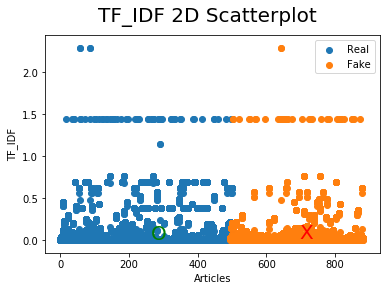

In [226]:
import matplotlib.pyplot as plt
import math
import copy

fakeTFIDF = copy.deepcopy(fakeArticlesTFIDF)
realTFIDF = copy.deepcopy(realArticlesTFIDF)

#MEAN
vec = []
nestVec = []
for art in fakeTFIDF:
    for word in fakeTFIDF[art]:
        nestVec.append(fakeTFIDF[art][word])
    vec.append(nestVec)
    nestVec=[]
vec = [item for sublist in vec for item in sublist]
fakeMean = np.mean(vec)

vec = []
nestVec = []
for art in realTFIDF:
    for word in realTFIDF[art]:
        nestVec.append(realTFIDF[art][word])
    vec.append(nestVec)
    nestVec=[]
vec = [item for sublist in vec for item in sublist]
realMean = np.mean(vec)

for key in fakeTFIDF:
    if key not in realTFIDF.keys():
        realTFIDF[key]={}
        realTFIDF[key]['null']=np.nan
for key in realTFIDF:
    if key not in fakeTFIDF.keys():
        fakeTFIDF[key]={}
        fakeTFIDF[key]['null']=np.nan
        
fig = plt.figure()
ax = fig.add_subplot(111)

x = []
y = []
x1=[]
y1=[]
xUnique=[]

    
    
for art in realTFIDF:
    xUnique.append(art)
    for word in realTFIDF[art]:
        x1.append(art)
        y1.append(realTFIDF[art][word])
    x.append(x1)
    y.append(y1)
    x1=[]
    y1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]

#ax.set_xlim([0, 5000000000])
ax.scatter(x, y)
ax.text(np.mean(x),realMean, 'O', size=20, color='g')

x = []
y = []
x1=[]
y1=[]
for art in fakeTFIDF:
    for word in fakeTFIDF[art]:
        x1.append(art)
        y1.append(fakeTFIDF[art][word])
    x.append(x1)
    y.append(y1)
    x1=[]
    y1=[]
x = [item+len(xUnique) for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]

#ax.set_xlim([0, 5000000000])
ax.scatter(x, y)
ax.text(np.mean(x),fakeMean, 'X', size=20, color='r')
ax.legend(('Real','Fake'))
ax.set_xlabel('Articles')
ax.set_ylabel('TF_IDF')
fig.suptitle('TF_IDF 2D Scatterplot', fontsize=20)


print(fakeMean)
print(realMean)

## CDF Plot TF-IDF (Articles)

0.021618963406023865
0.007370400556335715


(0, 0.8)

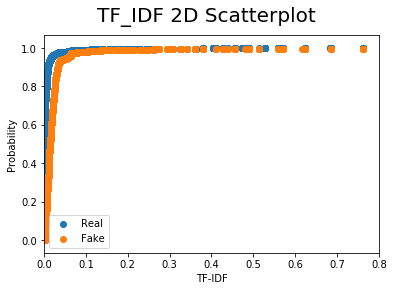

In [237]:
import matplotlib.pyplot as plt
import math
import copy
import numpy as np
import pandas as pd
import seaborn as sns

fakeTFIDF = copy.deepcopy(fakeArticlesTFIDF)
realTFIDF = copy.deepcopy(realArticlesTFIDF)

#MEAN
vec = []
nestVec = []
for art in fakeTFIDF:
    for word in fakeTFIDF[art]:
        nestVec.append(fakeTFIDF[art][word])
    vec.append(nestVec)
    nestVec=[]
vec = [item for sublist in vec for item in sublist]
fakeMean = np.mean(vec)

vec = []
nestVec = []
for art in realTFIDF:
    for word in realTFIDF[art]:
        nestVec.append(realTFIDF[art][word])
    vec.append(nestVec)
    nestVec=[]
vec = [item for sublist in vec for item in sublist]
realMean = np.mean(vec)

for key in fakeTFIDF:
    if key not in realTFIDF.keys():
        realTFIDF[key]={}
        realTFIDF[key]['null']=np.nan
for key in realTFIDF:
    if key not in fakeTFIDF.keys():
        fakeTFIDF[key]={}
        fakeTFIDF[key]['null']=np.nan
        
fig = plt.figure()
ax = fig.add_subplot(111)

y1 = []
y_temp=[]

    
    
for art in realTFIDF:
    for word in realTFIDF[art]:
        y_temp.append(realTFIDF[art][word])
    y1.append(y_temp)
    y_temp=[]
y1 = [item for sublist in y1 for item in sublist]


y2 = []

y_temp=[]
for art in fakeTFIDF:
    for word in fakeTFIDF[art]:
        y_temp.append(fakeTFIDF[art][word])
    y2.append(y_temp)
    y_temp=[]
y2 = [item for sublist in y2 for item in sublist]

print(fakeMean)
print(realMean)

#CDF
x = np.sort(y1)
n = x.size
y = np.arange(1, n+1) / n

ax.scatter(x=x, y=y);

x = np.sort(y2)
n = x.size
y = np.arange(1, n+1) / n

ax.scatter(x=x, y=y);

ax.legend(('Real','Fake'))
ax.set_xlabel('TF-IDF')
ax.set_ylabel('Probability')
fig.suptitle('TF_IDF 2D Scatterplot', fontsize=20)
plt.xlim(0,0.8)

## TF-IDF 2D t-SNE Scatterplot

In [214]:
x = []
y = []
x1=[]
y1=[]
 
realCopy = dict(realArticlesTFIDF)
fakeCopy = dict(fakeArticlesTFIDF)

for user in realCopy:
    for word in realCopy[user]:
        x1.append(user)
        y1.append(realCopy[user][word])
    x.append(x1)
    y.append(y1)
    x1=[]
    y1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]
y = [0 if math.isnan(x) else x for x in y]
combinedReal = np.vstack((x, y)).T
RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(combinedReal[:10000])

x2 = []
y2 = []
x1=[]
y1=[]
for user in fakeCopy:
    for word in fakeCopy[user]:
        x1.append(user)
        y1.append(fakeCopy[user][word])
    x2.append(x1)
    y2.append(y1)
    x1=[]
    y1=[]
x2 = [item for sublist in x2 for item in sublist]
y2 = [item for sublist in y2 for item in sublist]
y2 = [0 if math.isnan(x) else x for x in y2]
combinedFake = np.vstack((x2, y2)).T
RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points2 = tsne.fit_transform(combinedFake[:10000])

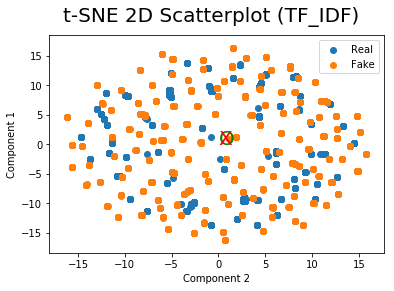

In [215]:
def plot_tsne_2d(x, y, x2, y2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    ax.text(np.mean(x),np.mean(y), 'O', size=20, color='g')
    ax.scatter(x2, y2)
    ax.text(np.mean(x2),np.mean(y2), 'X', size=20, color='r')
    ax.legend(('Real','Fake'))
    ax.set_xlabel('Component 2')
    ax.set_ylabel('Component 1')
    fig.suptitle('t-SNE 2D Scatterplot (TF_IDF)', fontsize=20)
plot_tsne_2d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    x2 = points2[:10000, 0],
    y2 = points2[:10000, 1])

## TF-IDF for Tweets

In [2]:
exploded = fakeArticlesPD.user.apply(pd.Series)
exploded.columns = [str(col) + '_user' for col in exploded.columns]
fakeArticlesPD = pd.concat([fakeArticlesPD.drop(columns='user'), exploded], axis=1)

exploded = realArticlesPD.user.apply(pd.Series)
exploded.columns = [str(col) + '_user' for col in exploded.columns]
realArticlesPD = pd.concat([realArticlesPD.drop(columns='user'), exploded], axis=1)

### TF

In [216]:
fakeArticlesTermFreq = {}
realArticlesTermFreq = {}

for user in fakeUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    if user not in fakeArticlesTermFreq.keys():
            fakeArticlesTermFreq[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(fakeArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        uniqueWords = []
        for word in wordsList:
            #print(word)
            counts = {}
            if word not in counts.keys():
                uniqueWords.append(word)
                counts[word] = 0
            counts[word] += 1
        for word in uniqueWords:
            if word not in fakeArticlesTermFreq[user].keys():
                fakeArticlesTermFreq[user][word] = 0
            for n_word in counts:
            #print(counts[n_word])
                fakeArticlesTermFreq[user][word]=counts[n_word]/len(wordsList)
    #print(fakeArticlesTermFreq[user])
    #print(fakeUsersTermFreq[user])
    

for user in realUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(realArticlesPD.loc[realArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    if user not in realArticlesTermFreq.keys():
            realArticlesTermFreq[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(realArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        uniqueWords = []
        for word in wordsList:
            #print(word)
            counts = {}
            if word not in counts.keys():
                uniqueWords.append(word)
                counts[word] = 0
            counts[word] += 1
        for word in uniqueWords:
            if word not in realArticlesTermFreq[user].keys():
                realArticlesTermFreq[user][word] = 0
            for n_word in counts:
            #print(counts[n_word])
                realArticlesTermFreq[user][word]=counts[n_word]/len(wordsList)
    print(realArticlesTermFreq[user])

{'0': 0.09090909090909091, '': 0.09090909090909091, 'foxxhole': 0.09090909090909091, 'best': 0.09090909090909091, 'guest': 0.09090909090909091, 'nominees': 0.09090909090909091, '11272': 0.09090909090909091, 'name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'4': 0.09090909090909091, 'thedemocrats': 0.09090909090909091, 'sure': 0.09090909090909091, '': 0.09090909090909091, 'defeatist': 0.09090909090909091, 'ment': 0.09090909090909091, 'name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'6': 0.09090909090909091, 'msnbc': 0.09090909090909091, 'halliejackson': 0.09090909090909091, 'hallie': 0.09090909090909091, '': 0.09090909090909091, 'know': 0.09090909090909091, 'name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'se

{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'96': 0.09090909090909091, 'estrechando': 0.09090909090909091, 'vínculos': 0.09090909090909091, 'entre': 0.09090909090909091, 'la': 0.09090909090909091, 'asce': 0.09090909090909091, 'amer': 0.09090909090909091, 'name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'98': 0.08333333333333333, '': 0.08333333333333333, 'believe': 0.08333333333333333, 'nation': 0.08333333333333333, 'comm': 0.08333333333333333, 'name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'104': 0.04, 'transcript': 0.04, '': 0.04, 'democratic': 0.04, 'debate': 0.04, 'mil': 0.04, '118': 0.04, 'cnn': 0.04, 'm

{'186': 0.08333333333333333, 'hiliarly': 0.08333333333333333, '': 0.08333333333333333, 'clip': 0.08333333333333333, 'surely': 0.08333333333333333, 'hasnt': 0.08333333333333333, 'aged': 0.08333333333333333, 'name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'190': 0.08333333333333333, 'pressley': 0.08333333333333333, 'accused': 0.08333333333333333, 'cap': 0.08333333333333333, '': 0.08333333333333333, 'voting': 0.08333333333333333, 'name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'194': 0.08333333333333333, '': 0.08333333333333333, 'driving': 0.08333333333333333, 'life': 0.08333333333333333, 'death': 0.08333333333333333, 'philando': 0.08333333333333333, 'name': 0.08333333333333333, 'text': 0.08333333333333333, 

{'280': 0.08333333333333333, 'according': 0.08333333333333333, '': 0.08333333333333333, 'results': 0.08333333333333333, 'latest': 0.08333333333333333, 'name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'284': 0.1, 'realdonaldtrump': 0.1, '': 0.1, 'years': 0.1, 'moon': 0.1, 'township': 0.1, 'name': 0.1, 'text': 0.1, 'dtype': 0.1, 'object': 0.1}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'288': 0.09090909090909091, 'january': 0.09090909090909091, '7the': 0.09090909090909091, 'finance': 0.09090909090909091, 'director': 0.09090909090909091, '': 0.09090909090909091, 'hill': 0.09090909090909091, 'name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'290': 0.1, 'davidshuster': 0.1, 'joyannrei

{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'376': 0.09090909090909091, 'nj': 0.09090909090909091, 'incumbent': 0.09090909090909091, 'senator': 0.09090909090909091, 'bob': 0.09090909090909091, 'menendez': 0.09090909090909091, 'voted': 0.09090909090909091, 'name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'378': 0.08333333333333333, '': 0.08333333333333333, 'week': 0.08333333333333333, 'offered': 0.08333333333333333, 'weekly': 0.08333333333333333, 'republic': 0.08333333333333333, 'name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'380': 0.08333333333333333, '': 0.08333333333333333, 'crispr': 0.08333333333333333, 'gene': 0.08333333333333333, 'editing': 0.08333333333333333, 'scientific': 0.08333333333333333, 'fea': 0.08333333333333333, 'name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'o

{'478': 0.09090909090909091, '': 0.09090909090909091, 'new': 0.09090909090909091, 'study': 0.09090909090909091, 'overturns': 0.09090909090909091, 'economic': 0.09090909090909091, 'orthodoxy': 0.09090909090909091, 'name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'480': 0.09090909090909091, '': 0.09090909090909091, 'ny': 0.09090909090909091, 'times': 0.09090909090909091, 'coincidentally': 0.09090909090909091, 'publish': 0.09090909090909091, 'name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'490': 0.09090909090909091, 'alivelshi': 0.09090909090909091, '': 0.09090909090909

{'592': 0.08333333333333333, 'obama': 0.08333333333333333, '': 0.08333333333333333, 'nation': 0.08333333333333333, 'workers': 0.08333333333333333, 'ap': 0.08333333333333333, 'name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'594': 0.08333333333333333, 'one': 0.08333333333333333, 'year': 0.08333333333333333, '': 0.08333333333333333, 'tonight': 0.08333333333333333, 'president': 0.08333333333333333, 'wi': 0.08333333333333333, 'name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'596': 0.1111111111111111, 'pmlnbheraconvention': 0.1111111111111111, 'convention': 0.1111111111111111, 'cancelled': 0.1111111111111111, '': 0.1111111111111111, 'name': 0.1111111111111111, 'text': 0.1111111111111111, 'dtype': 0.1111111111111111, 'object': 0.1111111111111111}
{'598': 0.09090909090909091, 'secret': 0.09090909090909091, 'video': 0.09090909090909091, 'romney': 0.09090

{'699': 0.09090909090909091, 'politics': 0.09090909090909091, 'government': 0.09090909090909091, 'rep': 0.09090909090909091, 'john': 0.09090909090909091, 'lewis': 0.09090909090909091, 'ho': 0.09090909090909091, 'name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'705': 0.09090909090909091, 'cnn': 0.09090909090909091, 'beafihn': 0.09090909090909091, 'cnnopinion': 0.09090909090909091, 'article': 0.09090909090909091, 'amp': 0.09090909090909091, '': 0.09090909090909091, 'name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}
{'709': 0.08333333333333333, '': 0.08333333333333333, 'anxiously': 0.08333333333333333, 'await': 0.08333333333333333, 'scotus': 0.08333333333333333, 'pick': 0.08333333333333333, 'reg': 0.0833333333333

{'811': 0.07692307692307693, 'rosco': 0.07692307692307693, 'newyorker': 0.07692307692307693, '': 0.07692307692307693, 'get': 0.07692307692307693, 'name': 0.07692307692307693, 'text': 0.07692307692307693, 'dtype': 0.07692307692307693, 'object': 0.07692307692307693}
{'813': 0.1111111111111111, 'joanne00350': 0.1111111111111111, 'christene101': 0.1111111111111111, 'bosslady2898': 0.1111111111111111, '': 0.1111111111111111, 'name': 0.1111111111111111, 'text': 0.1111111111111111, 'dtype': 0.1111111111111111, 'object': 0.1111111111111111}
{'series': 0.2, 'name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object': 0.2}


### IDF

In [217]:
#IDF = LOG(N_art/Ni_term) - number of documents/number of documents term appear in
import math
N_art_tot = len(fakeArticlesPD)+len(realArticlesPD)
fakeArticlesIDF = {}
realArticlesIDF={}
counts = {}
N_art = 0
userTerms = {}

for user in fakeUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(fakeArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        
        wordsList = words.split()
        #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        for word in wordsList:
            if word not in counts.keys():
                counts[word] = 0
            if counts[word] == N_art:
                counts[word] += 1
        N_art += 1      

for user in fakeUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    uniqueWords = []
    if user not in fakeArticlesIDF.keys():
        fakeArticlesIDF[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(fakeArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
            #print(word)
        for word in wordsList:
            if word not in uniqueWords:
                uniqueWords.append(word)
    for word in uniqueWords:
        if word not in fakeArticlesIDF[user].keys():
            fakeArticlesIDF[user][word] = 0
        for count in counts:
            #print(counts[n_word])
            fakeArticlesIDF[user][word]=math.log(1+N_art_tot/(1+counts[word])) #+1 to avoid zero division
    print(fakeArticlesIDF[user])
    
    
        
N_art = 0
userTerms = {}
for user in realUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(realArticlesPD.loc[realArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        print(realArticlesPD['text'][row].str.split())
        terms[user].append(realArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        for word in wordsList:
            if word not in counts.keys():
                counts[word] = 0
            if counts[word] == N_art:
                counts[word] += 1
        N_art += 1  
        

for user in realUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(realArticlesPD.loc[realArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    uniqueWords = []
    if user not in realArticlesIDF.keys():
        realArticlesIDF[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(realArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        #wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        wordsList = [remove_Symbols(i) for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
            #print(word)
        for word in wordsList:
            if word not in uniqueWords:
                uniqueWords.append(word)
    for word in uniqueWords:
        if word not in realArticlesIDF[user].keys():
            realArticlesIDF[user][word] = 0
        for count in counts:
            #print(counts[n_word])
            realArticlesIDF[user][word]=math.log(1+N_art_tot/(1+counts[word])) #+1 to avoid zero division
    #print(realArticlesIDF[user])

{'0': 5.7477993600729755, 'virginia': 5.7477993600729755, 'republican': 5.7477993600729755, 'wants': 5.7477993600729755, 'schools': 5.7477993600729755, '': 5.343927877800089, 'che': 5.7477993600729755, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'2': 6.439350371100098, 'facts': 6.439350371100098, 'take': 6.439350371100098, '': 5.343927877800089, 'vacation': 6.439350371100098, 'occupy': 6.439350371100098, 'democra': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'4': 6.439350371100098, 'keatley4change': 6.439350371100098, 'briankempga': 6.439350371100098, 'butler4ga': 6.439350371100098, 'wh': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'6': 6.439350371100098, 'denzel': 6.439350371100098, 'washington': 6.439350371100098, 'hit': 6.439350371100098, '': 5.343927877800

{'64': 6.439350371100098, 'idaho': 6.439350371100098, 'mother': 6.439350371100098, 'sentenced': 6.439350371100098, '': 5.343927877800089, 'prison': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'66': 6.439350371100098, 'new': 6.439350371100098, 'law': 6.439350371100098, '': 5.343927877800089, 'charging': 6.439350371100098, 'violent': 6.439350371100098, 'protes': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'68': 6.439350371100098, 'bill': 6.439350371100098, 'gates': 6.439350371100098, '': 5.343927877800089, 'think': 6.439350371100098, 'donald': 6.439350371100098, 'trump': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'70': 6.439350371100098, 'breaking': 6.439350371100098, 'trump': 6.439350371100098, 'caught': 6.439350371100098, 'investing': 6.439

{'128': 6.439350371100098, 'breaking': 6.439350371100098, 'ken': 6.439350371100098, 'starrs': 6.439350371100098, 'plane': 6.439350371100098, '': 5.343927877800089, 'disappe': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'130': 6.439350371100098, 'autopsy': 6.439350371100098, 'results': 6.439350371100098, '': 5.343927877800089, 'vince': 6.439350371100098, 'fosters': 6.439350371100098, 'exhu': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'132': 6.439350371100098, 'new': 6.439350371100098, 'regulation': 6.439350371100098, 'requires': 6.439350371100098, 'motorcycle': 6.439350371100098, 'owners': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'series': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'o

{'186': 6.439350371100098, '': 5.343927877800089, 'barack': 6.439350371100098, 'obama': 6.439350371100098, 'arrested': 6.439350371100098, 'ja': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'188': 6.439350371100098, 'breaking': 6.439350371100098, 'fbi': 6.439350371100098, 'uncovers': 6.439350371100098, 'evidence': 6.439350371100098, '': 5.343927877800089, '62': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'190': 6.439350371100098, 'jefferson': 6.439350371100098, 'davis': 6.439350371100098, 'statue': 6.439350371100098, '': 5.343927877800089, 'replaced': 6.439350371100098, 'w': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'192': 6.439350371100098, 'alpolitics': 6.439350371100098, '': 5.343927877800089, 'motorcyclist': 6.439350371100098, 'raleigh':

{'248': 6.439350371100098, 'un': 6.439350371100098, 'official': 6.439350371100098, 'john': 6.439350371100098, 'ashe': 6.439350371100098, 'set': 6.439350371100098, '': 5.343927877800089, 'testify': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'250': 6.439350371100098, 'manager': 6.439350371100098, 'killed': 6.439350371100098, '10': 6.439350371100098, 'employees': 6.439350371100098, '': 5.343927877800089, 'checkers': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'252': 6.439350371100098, 'paul': 6.439350371100098, 'ryan': 6.439350371100098, 'donald': 6.439350371100098, 'trump': 6.439350371100098, 'plans': 6.439350371100098, '': 5.343927877800089, 'resig': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'254': 6.439350371100098, 'australia': 6.4393503

{'311': 6.439350371100098, 'whoopi': 6.439350371100098, 'goldberg': 6.439350371100098, 'humiliated': 6.439350371100098, 'handcuffed': 6.439350371100098, '': 5.343927877800089, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'313': 6.439350371100098, 'bombshell': 6.439350371100098, 'internet': 6.439350371100098, 'sleuths': 6.439350371100098, '': 5.343927877800089, 'found': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'315': 6.439350371100098, 'sundaymorning': 6.439350371100098, 'fact': 6.439350371100098, 'check': 6.439350371100098, '': 5.343927877800089, 'white': 6.439350371100098, 'sup': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'317': 6.439350371100098, 'breaking': 6.439350371100098, 'rosa': 6.439350371100098, 'parks': 6.439350371100098, 'daughter': 6.4393503711

{'379': 6.439350371100098, 'san': 6.439350371100098, 'juan': 6.439350371100098, 'city': 6.439350371100098, 'council': 6.439350371100098, 'votes': 6.439350371100098, 'unanimously': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'series': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'383': 6.439350371100098, 'ice': 6.439350371100098, 'detainer': 6.439350371100098, 'issued': 6.439350371100098, '': 5.343927877800089, 'suspected': 6.439350371100098, 'wine': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'385': 6.439350371100098, 'breaking': 6.439350371100098, 'black': 6.439350371100098, 'hockey': 6.439350371100098, 'player': 6.439350371100098, 'fired': 6.439350371100098, 'afte': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dty

{'series': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'449': 6.439350371100098, 'called': 6.439350371100098, '': 5.343927877800089, 'gloria': 6.439350371100098, 'allred': 6.439350371100098, 'accuser': 6.439350371100098, 'admits': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'451': 6.439350371100098, 'breaking': 6.439350371100098, 'woman': 6.439350371100098, 'says': 6.439350371100098, '': 5.343927877800089, 'offered': 6.439350371100098, 'bi': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'453': 6.439350371100098, 'breaking': 6.439350371100098, 'roy': 6.439350371100098, 'moores': 6.439350371100098, 'accuser': 6.439350371100098, 'arrested': 6.439350371100098, '': 5.343927877800089, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95

{'523': 6.439350371100098, 'singer': 6.439350371100098, 'dolly': 6.439350371100098, 'parton': 6.439350371100098, 'trump': 6.439350371100098, '': 5.343927877800089, 'one': 6.439350371100098, 'year': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'series': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'525': 6.439350371100098, 'nfl': 6.439350371100098, 'lawyer': 6.439350371100098, '': 5.343927877800089, 'claimed': 6.439350371100098, 'super': 6.439350371100098, 'bowl': 6.439350371100098, '711': 6.439350371100098, 'investigators': 6.439350371100098, 'anthony': 6.439350371100098, 'bourdain': 6.439350371100098, 'kille': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'529': 6.439350371100098, '': 5.343927877800089, 'bare': 6.439350371100098, 'watch': 6.439

{'586': 6.439350371100098, '': 5.343927877800089, 'fake': 6.439350371100098, 'photo': 6.439350371100098, 'emma': 6.439350371100098, 'gonzález': 6.439350371100098, 'went': 6.439350371100098, 'vir': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'series': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'590': 6.439350371100098, 'new': 6.439350371100098, 'study': 6.439350371100098, 'says': 6.439350371100098, '80': 6.439350371100098, '': 5.343927877800089, 'black': 6.439350371100098, 'men': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'592': 6.439350371100098, 'via': 6.439350371100098, 'time': 6.439350371100098, '': 5.343927877800089, 'student': 6.439350371100098, 'started': 6.439350371100098, 'filming': 6.439350371100098, 'du': 6.439350371100098, 'name

{'series': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'653': 6.439350371100098, 'cnn': 6.439350371100098, 'shocks': 6.439350371100098, 'america': 6.439350371100098, 'fires': 6.439350371100098, 'journalist': 6.439350371100098, 'w': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'655': 6.439350371100098, 'smallville': 6.439350371100098, 'star': 6.439350371100098, 'confesses': 6.439350371100098, '': 5.343927877800089, 'sold': 6.439350371100098, 'chi': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'657': 6.439350371100098, 'breaking': 6.439350371100098, 'czech': 6.439350371100098, 'republic': 6.439350371100098, 'arms': 6.439350371100098, 'citizens': 6.439350371100098, '': 5.343927877800089, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype'

{'709': 6.439350371100098, 'mitt': 6.439350371100098, 'romney': 6.439350371100098, 'trump': 6.439350371100098, '': 5.343927877800089, 'serio': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'713': 6.439350371100098, 'trumps': 6.439350371100098, 'dhs': 6.439350371100098, 'secretary': 6.439350371100098, 'kirstjen': 6.439350371100098, 'nielsen': 6.439350371100098, 'c': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'715': 6.439350371100098, 'breaking': 6.439350371100098, 'shep': 6.439350371100098, 'smith': 6.439350371100098, '': 5.343927877800089, 'canned': 6.439350371100098, 'becau': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'717': 6.439350371100098, 'trump': 6.439350371100098, 'approval': 6.439350371100098, 'rating': 6.439350371100098, 'better': 

{'773': 6.439350371100098, 'hillary': 6.439350371100098, '': 5.343927877800089, 'hiding': 6.439350371100098, 'police': 6.439350371100098, 'discover': 6.439350371100098, 'de': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
{'series': 6.439350371100098, 'name': 0.95966616462541, 'text': 0.95966616462541, 'dtype': 0.95966616462541, 'object': 0.95966616462541}
0    [The, Foxxhole, Best, Guest, Nominees, 11.27.2...
Name: text, dtype: object
Series([], Name: text, dtype: object)
4    [@TheDemocrats, sure, have, a, defeatist, ment...
Name: text, dtype: object
6    [@msnbc, @HallieJackson, Hallie, I, know, it's...
Name: text, dtype: object
Series([], Name: text, dtype: object)
10    [@SenSchumer, You, do, of, course, realize, th...
Name: text, dtype: object
12    [..., he, agreed, with, the, decision, to, rep...
Name: text, dtype: object
Series([], Name: text, dtype: object)
16    [@ShellenbergerMD, @CouchRambo, @st

248    [Donald, Trump, exaggerates, when, he, says, C...
Name: text, dtype: object
250    [I, wish, I, could, paper, the, bathroom, wall...
Name: text, dtype: object
252    [This, might, be, relevant, (if, anything, is,...
Name: text, dtype: object
254    [@Trump454545, Pres., Trump, referred, to, Rep...
Name: text, dtype: object
256    [Today,, on, the, floor, of, the, US, House, o...
Name: text, dtype: object
258    [Should, I, take, this, personally, @Scaramucc...
Name: text, dtype: object
Series([], Name: text, dtype: object)
262    [President, Grover, Cleveland, declared, the, ...
Name: text, dtype: object
264    [@Garrett_M_Scott, @kjblackhawk, @GFelipe7, @T...
Name: text, dtype: object
266    [Schneiderman, suing, Trump, over, DACA, cites...
Name: text, dtype: object
268    [I, was, so, excited, to, be, home, for, Meet,...
Name: text, dtype: object
Series([], Name: text, dtype: object)
272    ["H.R.1424, -, A, bill, to, provide, authority...
Name: text, dtype: object
274    [@de

508    [@ClarkGreenaway, @SkyNewsAust, @RealBobKatter...
Name: text, dtype: object
510    [Hey, everyone, could, y’all, help, me, with, ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
516    [#Mitt, Romney, says, there, are, 25, Million,...
Name: text, dtype: object
518    [Chicago, pastors, from, Life, Changers, Inter...
Name: text, dtype: object
520    [Press, Coverage, of, Food, Bloggers, Meet, at...
Name: text, dtype: object
522    ["A, 2016, study, by, the, Centers, for, Disea...
Name: text, dtype: object
524    [@MarkSalter55, I’m, a, producer, with, Austra...
Name: text, dtype: object
Series([], Name: text, dtype: object)
528    [@SamuelLJackson, I, wanna, see, him, name, 10...
Name: text, dtype: object
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
540    [.@SeanTunis, rec:, focus

807    [Two, days, after, Robert, DeNiro's, anti-Trum...
Name: text, dtype: object
Series([], Name: text, dtype: object)
811    [@rosco, @NewYorker, I, get, it, but, just, in...
Name: text, dtype: object
813    [@joanne00350, @Christene101, @bosslady2898, @...
Name: text, dtype: object
Series([], Name: text, dtype: object)


### TF-IDF

In [218]:
fakeArticlesTFIDF = {}
realArticlesTFIDF = {}
for user in fakeArticlesTermFreq:
    if user not in fakeArticlesTFIDF.keys():
        fakeArticlesTFIDF[user] = {}
    for word in fakeArticlesTermFreq[user]:
        if word not in fakeArticlesTFIDF[user].keys():
            fakeArticlesTFIDF[user][word] = 0
        try:
            fakeArticlesTFIDF[user][word] = fakeArticlesTermFreq[user][word]*fakeArticlesIDF[user][word]
        except KeyError:
            pass
for user in realArticlesTermFreq:
    if user not in realArticlesTFIDF.keys():
        realArticlesTFIDF[user] = {}
    for word in realArticlesTermFreq[user]:
        if word not in realArticlesTFIDF[user].keys():
            realArticlesTFIDF[user][word] = 0
        try:
            realArticlesTFIDF[user][word] = realArticlesTermFreq[user][word]*realArticlesIDF[user][word]
        except KeyError:
            pass
print(realArticlesTFIDF)

{265524291: {'0': 0.5225272145520887, '': 0.43966199154104346, 'foxxhole': 0.5225272145520887, 'best': 0.5225272145520887, 'guest': 0.5225272145520887, 'nominees': 0.5225272145520887, '11272': 0.5225272145520887, 'name': 0.08338652803215506, 'text': 0.08338652803215506, 'dtype': 0.08338652803215506, 'object': 0.08338652803215506}, 22202313: {'series': 1.2878700742200198, 'name': 0.18345036167074114, 'text': 0.18345036167074114, 'dtype': 0.18345036167074114, 'object': 0.18345036167074114}, 40182407: {'4': 0.5853954882818272, 'thedemocrats': 0.5853954882818272, 'sure': 0.5853954882818272, '': 0.43966199154104346, 'defeatist': 0.5853954882818272, 'ment': 0.5853954882818272, 'name': 0.08338652803215506, 'text': 0.08338652803215506, 'dtype': 0.08338652803215506, 'object': 0.08338652803215506}, 806056926983426049: {'6': 0.5853954882818272, 'msnbc': 0.5853954882818272, 'halliejackson': 0.5853954882818272, 'hallie': 0.5853954882818272, '': 0.43966199154104346, 'know': 0.5853954882818272, 'name

## TF-IDF 2D Scatterplot (Tweets)

0.36742383356067193
0.37244006548254305


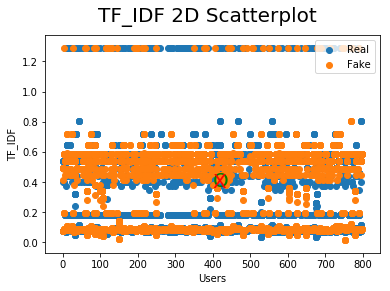

In [219]:
import matplotlib.pyplot as plt
import math
import copy

fakeTFIDF = copy.deepcopy(fakeArticlesTFIDF)
realTFIDF = copy.deepcopy(realArticlesTFIDF)
#MEAN
vec = []
nestVec = []
for user in fakeTFIDF:
    for word in fakeTFIDF[user]:
        nestVec.append(fakeTFIDF[user][word])
    vec.append(nestVec)
    nestVec=[]
vec = [item for sublist in vec for item in sublist]
fakeMean = np.mean(vec)

vec = []
nestVec = []
for user in realTFIDF:
    for word in realTFIDF[user]:
        nestVec.append(realTFIDF[user][word])
    vec.append(nestVec)
    nestVec=[]
vec = [item for sublist in vec for item in sublist]
realMean = np.mean(vec)

for key in fakeTFIDF:
    if key not in realTFIDF.keys():
        realTFIDF[key]={}
        realTFIDF[key]['null']=np.nan
for key in realTFIDF:
    if key not in fakeTFIDF.keys():
        fakeTFIDF[key]={}
        fakeTFIDF[key]['null']=np.nan
        
fig = plt.figure()
ax = fig.add_subplot(111)

x = []
y = []
x1=[]
y1=[]
xUnique=[]

keys = sorted(set(list(realTFIDF.keys())+list(fakeTFIDF.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realTFIDF.keys()]
for i,key in enumerate(temp):
        realTFIDF[key] = realTFIDF.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeTFIDF.keys()]
for i,key in enumerate(temp):
    fakeTFIDF[key] = fakeTFIDF.pop(list(d2)[i])
    
    
for user in realTFIDF:
    xUnique.append(user)
    for word in realTFIDF[user]:
        x1.append(user)
        y1.append(realTFIDF[user][word])
    x.append(x1)
    y.append(y1)
    x1=[]
    y1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]

lim = math.pow(5, 9)
xUnique = [i for i in xUnique if i <= lim]
#ax.set_xlim([0, 5000000000])
ax.scatter(x, y)
ax.text(np.mean(xUnique),realMean, 'O', size=20, color='g')

x = []
y = []
x1=[]
y1=[]
xUnique=[]
for user in fakeTFIDF:
    xUnique.append(user)
    for word in fakeTFIDF[user]:
        x1.append(user)
        y1.append(fakeTFIDF[user][word])
    x.append(x1)
    y.append(y1)
    x1=[]
    y1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]

#ax.set_xlim([0, 5000000000])
ax.scatter(x, y)
ax.legend(('Real','Fake'))
ax.set_xlabel('Users')
ax.set_ylabel('TF_IDF')
fig.suptitle('TF_IDF 2D Scatterplot', fontsize=20)
lim = math.pow(5, 9)
xUnique = [i for i in xUnique if i <= lim]

#fjern elementer større enn 5e9 fra xUnique
ax.text(np.mean(xUnique),fakeMean, 'X', size=20, color='r')

print(fakeMean)
print(realMean)

## TF-IDF 3D Scatterplot

Text(386.91101788474276, 7.6334731728858465, 'X')

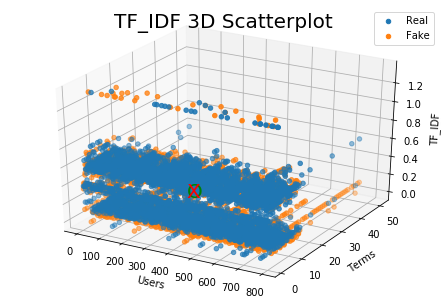

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import copy

realCp = dict(realTFIDF)
fakeCp = dict(fakeTFIDF)
realCp2 = {}
realCp2 = copy.deepcopy(realTFIDF)
#add values from set of real and fake to realUsersTotal if 77

keys = []
for user in realCp.keys():
    keys = sorted(set(list(realCp[user].keys())+list(fakeCp[user].keys())))
    d = dict([(y,x+1) for x,y in enumerate(keys)])
    temp = [d[x] for x in realCp[user].keys()]
    realKeys = [x for x in realCp[user].keys()]
    for i,term in enumerate(temp):
        realCp[user][term] = realCp[user].pop(realKeys[i])
keys = []       
        
for user in fakeCp.keys():
    keys = sorted(set(list(realCp2[user].keys())+list(fakeCp[user].keys())))
    d = dict([(y,x+1) for x,y in enumerate(keys)])
    temp2 = [d[x] for x in fakeCp[user].keys()]
    fakeKeys = [x for x in fakeCp[user].keys()]
    for i,term in enumerate(temp2):
        fakeCp[user][term] = fakeCp[user].pop(fakeKeys[i])
        
        
fig = plt.figure()
ax = Axes3D(fig)

x = []
y = []
z = []
x1=[]
y1=[]
z1=[]
xUnique=[]
for user in realCp:
    xUnique.append(hash(user))
    for word in realCp[user]:
        x1.append(user)
        y1.append(word)
        z1.append(realCp[user][word])
    x.append(x1)
    y.append(y1)
    z.append(z1)
    x1=[]
    y1=[]
    z1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]
z = [item for sublist in z for item in sublist]


z=np.array(z)

ax.scatter(x, y, z, zorder=1)
ax.text(np.mean(x),np.mean(y),z[~np.isnan(z)].mean(), 'O', size=20, zorder=10, color='g')

x = []
y = []
z = []
x1=[]
y1=[]
z1=[]
xUnique=[]
for user in fakeCp:
    xUnique.append(user)
    for word in fakeCp[user]:
        x1.append(user)
        y1.append(word)
        z1.append(fakeCp[user][word])
    x.append(x1)
    y.append(y1)
    z.append(z1)
    x1=[]
    y1=[]
    z1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]
z = [item for sublist in z for item in sublist]

ax.scatter(x, y, z, zorder=5)

ax.legend(('Real','Fake'))
ax.set_xlabel('Users')
ax.set_ylabel('Terms')
ax.set_zlabel('TF_IDF')
fig.suptitle('TF_IDF 3D Scatterplot', fontsize=20)


#fjern elementer større enn 5e9 fra xUnique
z = np.array(z)
ax.text(np.mean(x),np.mean(y),z[~np.isnan(z)].mean(), 'X', size=20, zorder=10, color='r')
#ax.text(np.mean(x),np.mean(y),np.mean(z),  'FAKE', size=20, zorder=10, color='k')
#ax.annotate('annotate', xy=(2, 1), xytext=(3, 4), arrowprops=dict(facecolor='black', shrink=0.05))

#label centers

## t-SNE 2D Scatter Plot (TF_IDF)

In [24]:
x = []
y = []
x1=[]
y1=[]
 
realCopy = dict(realArticlesTFIDF)
fakeCopy = dict(fakeArticlesTFIDF)

for user in realCopy:
    for word in realCopy[user]:
        x1.append(user)
        y1.append(realCopy[user][word])
    x.append(x1)
    y.append(y1)
    x1=[]
    y1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]
y = [0 if math.isnan(x) else x for x in y]
combinedReal = np.vstack((x, y)).T
RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(combinedReal[:10000])

x2 = []
y2 = []
x1=[]
y1=[]
for user in fakeCopy:
    for word in fakeCopy[user]:
        x1.append(user)
        y1.append(fakeCopy[user][word])
    x2.append(x1)
    y2.append(y1)
    x1=[]
    y1=[]
x2 = [item for sublist in x2 for item in sublist]
y2 = [item for sublist in y2 for item in sublist]
y2 = [0 if math.isnan(x) else x for x in y2]
combinedFake = np.vstack((x2, y2)).T
RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points2 = tsne.fit_transform(combinedFake[:10000])

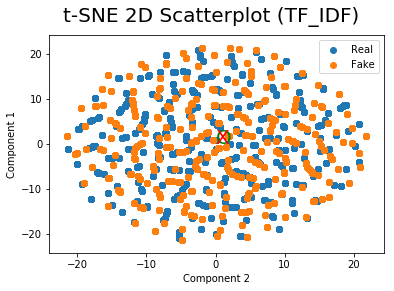

In [25]:
def plot_tsne_2d(x, y, x2, y2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    ax.text(np.mean(x),np.mean(y), 'O', size=20, color='g')
    ax.scatter(x2, y2)
    ax.text(np.mean(x2),np.mean(y2), 'X', size=20, color='r')
    ax.legend(('Real','Fake'))
    ax.set_xlabel('Component 2')
    ax.set_ylabel('Component 1')
    fig.suptitle('t-SNE 2D Scatterplot (TF_IDF)', fontsize=20)
plot_tsne_2d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    x2 = points2[:10000, 0],
    y2 = points2[:10000, 1])

## t_SNE 3D Scatterplot (TF_IDF)

In [26]:
x = []
y = []
z=[]
x1=[]
y1=[]
z1=[]
for user in realArticlesTFIDF:
    for word in realArticlesTFIDF[user]:
        x1.append(hash(user))
        y1.append(hash(word))
        z1.append(realArticlesTFIDF[user][word])
    x.append(x1)
    y.append(y1)
    z.append(z1)
    x1=[]
    y1=[]
    z1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]
z = [item for sublist in z for item in sublist]
z = [0 if math.isnan(x) else x for x in z]
combinedReal = np.vstack((x, y, z)).T
RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(combinedReal[:10000])

x2 = []
y2 = []
z2 = []
x1=[]
y1=[]
z1=[]
for user in fakeArticlesTFIDF:
    for word in fakeArticlesTFIDF[user]:
        x1.append(hash(user))
        y1.append(hash(word))
        z1.append(fakeArticlesTFIDF[user][word])
    x2.append(x1)
    y2.append(y1)
    z2.append(z1)
    x1=[]
    y1=[]
    z1=[]
x2 = [item for sublist in x2 for item in sublist]
y2 = [item for sublist in y2 for item in sublist]
z2 = [item for sublist in z2 for item in sublist]
z2 = [0 if math.isnan(x) else x for x in z2]
combinedFake = np.vstack((x2, y2, z2)).T
RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=300, random_state=RANDOM_STATE)
points2 = tsne.fit_transform(combinedFake[:10000])

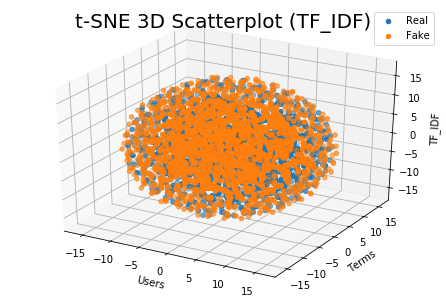

In [29]:
from mpl_toolkits.mplot3d import Axes3D
def plot_tsne_3d(x, y, z, x2, y2, z2):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z)
    ax.scatter(x2, y2, z2)
    ax.text(np.mean(x),np.mean(y), np.mean(z), 'O', size=20, color='g')
    ax.text(np.mean(x2),np.mean(y2), np.mean(z2), 'X', size=20, color='r')
    ax.legend(('Real','Fake'))
    ax.set_xlabel('Users')
    ax.set_ylabel('Terms')
    ax.set_zlabel('TF_IDF')
    fig.suptitle('t-SNE 3D Scatterplot (TF_IDF)', fontsize=20)
plot_tsne_3d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    z = points[:10000, 2],
    x2 = points2[:10000, 0],
    y2 = points2[:10000, 1],
    z2 = points2[:10000, 2])